In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import MDAnalysis as mda
import pandas as pd
import seaborn as sns
from tqdm import tqdm
from scipy.stats import sem

In [35]:
C36_loc="charmm36m/"
D19_loc="drude2019/"
D19n_loc="drude2019Na_NBFIX/"
Amber_loc="amberff99sbnmr1/"

# Extraction of residue name and resid

In [14]:

three_to_one_letter = {
    'ALA': 'A', 'CYS': 'C', 'ASP': 'D', 'GLU': 'E', 'PHE': 'F', 'GLY': 'G', 'HIS': 'H',
    'ILE': 'I', 'LYS': 'K', 'LEU': 'L', 'MET': 'M', 'ASN': 'N', 'PRO': 'P', 'GLN': 'Q',
    'ARG': 'R', 'SER': 'S', 'THR': 'T', 'VAL': 'V', 'TRP': 'W', 'TYR': 'Y', 'SEC': 'U', 'PYL': 'O', 'HSD': 'H'
}

def parse_pdb_file(pdb_filename):
    residue_dict = {}
    with open(pdb_filename, 'r') as pdb_file:
        for line in pdb_file:
            if line.startswith("ATOM"):
                residue_name = line[17:20].strip()  
                residue_number = int(line[22:26].strip())  
                
                if residue_name in three_to_one_letter:
                    single_letter_residue = three_to_one_letter[residue_name]
                    if residue_number not in residue_dict:
                        residue_dict[residue_number] = single_letter_residue
                else:
                    print(f"Unknown residue: {residue_name} at position {residue_number}")
    return residue_dict

pdb_filename = 'Im7.pdb'  
residue_dict = parse_pdb_file(pdb_filename)


# Figure 1 RMSF

In [15]:
C36_s1_RMSF=np.load(f"{C36_loc}RMSF/set1/rmsf_N.npz",allow_pickle=True)
C36_s2_RMSF=np.load(f"{C36_loc}RMSF/set2/rmsf_N.npz",allow_pickle=True)

D19_s1_RMSF=np.load(f"{D19_loc}RMSF/set1/rmsf_N.npz",allow_pickle=True)
D19_s2_RMSF=np.load(f"{D19_loc}RMSF/set2/rmsf_N.npz",allow_pickle=True)
D19_s3_RMSF=np.load(f"{D19_loc}RMSF/set3/rmsf_N.npz",allow_pickle=True)

D19n_s1_RMSF=np.load(f"{D19n_loc}RMSF/set1/rmsf_N.npz",allow_pickle=True)
D19n_s2_RMSF=np.load(f"{D19n_loc}RMSF/set2/rmsf_N.npz",allow_pickle=True)
D19n_s3_RMSF=np.load(f"{D19n_loc}RMSF/set3/rmsf_N.npz",allow_pickle=True)

RMSF_Amber=np.load(f"{Amber_loc}RMSF/rmsf_N.npz",allow_pickle=True)

In [16]:
RMSF_C36=np.mean(np.vstack([C36_s1_RMSF["rmsf"],C36_s2_RMSF["rmsf"]]),axis=0)
RMSF_C36_std=np.std(np.vstack([C36_s1_RMSF["rmsf"],C36_s2_RMSF["rmsf"]]),axis=0)

RMSF_D19=np.mean(np.vstack([D19_s1_RMSF["rmsf"],D19_s2_RMSF["rmsf"],D19_s3_RMSF["rmsf"]]),axis=0)
RMSF_D19_std=np.std(np.vstack([D19_s1_RMSF["rmsf"],D19_s2_RMSF["rmsf"],D19_s3_RMSF["rmsf"]]),axis=0)

RMSF_D19n=np.mean(np.vstack([D19n_s1_RMSF["rmsf"],D19n_s2_RMSF["rmsf"],D19n_s3_RMSF["rmsf"]]),axis=0)
RMSF_D19n_std=np.std(np.vstack([D19n_s1_RMSF["rmsf"],D19n_s2_RMSF["rmsf"],D19n_s3_RMSF["rmsf"]]),axis=0)

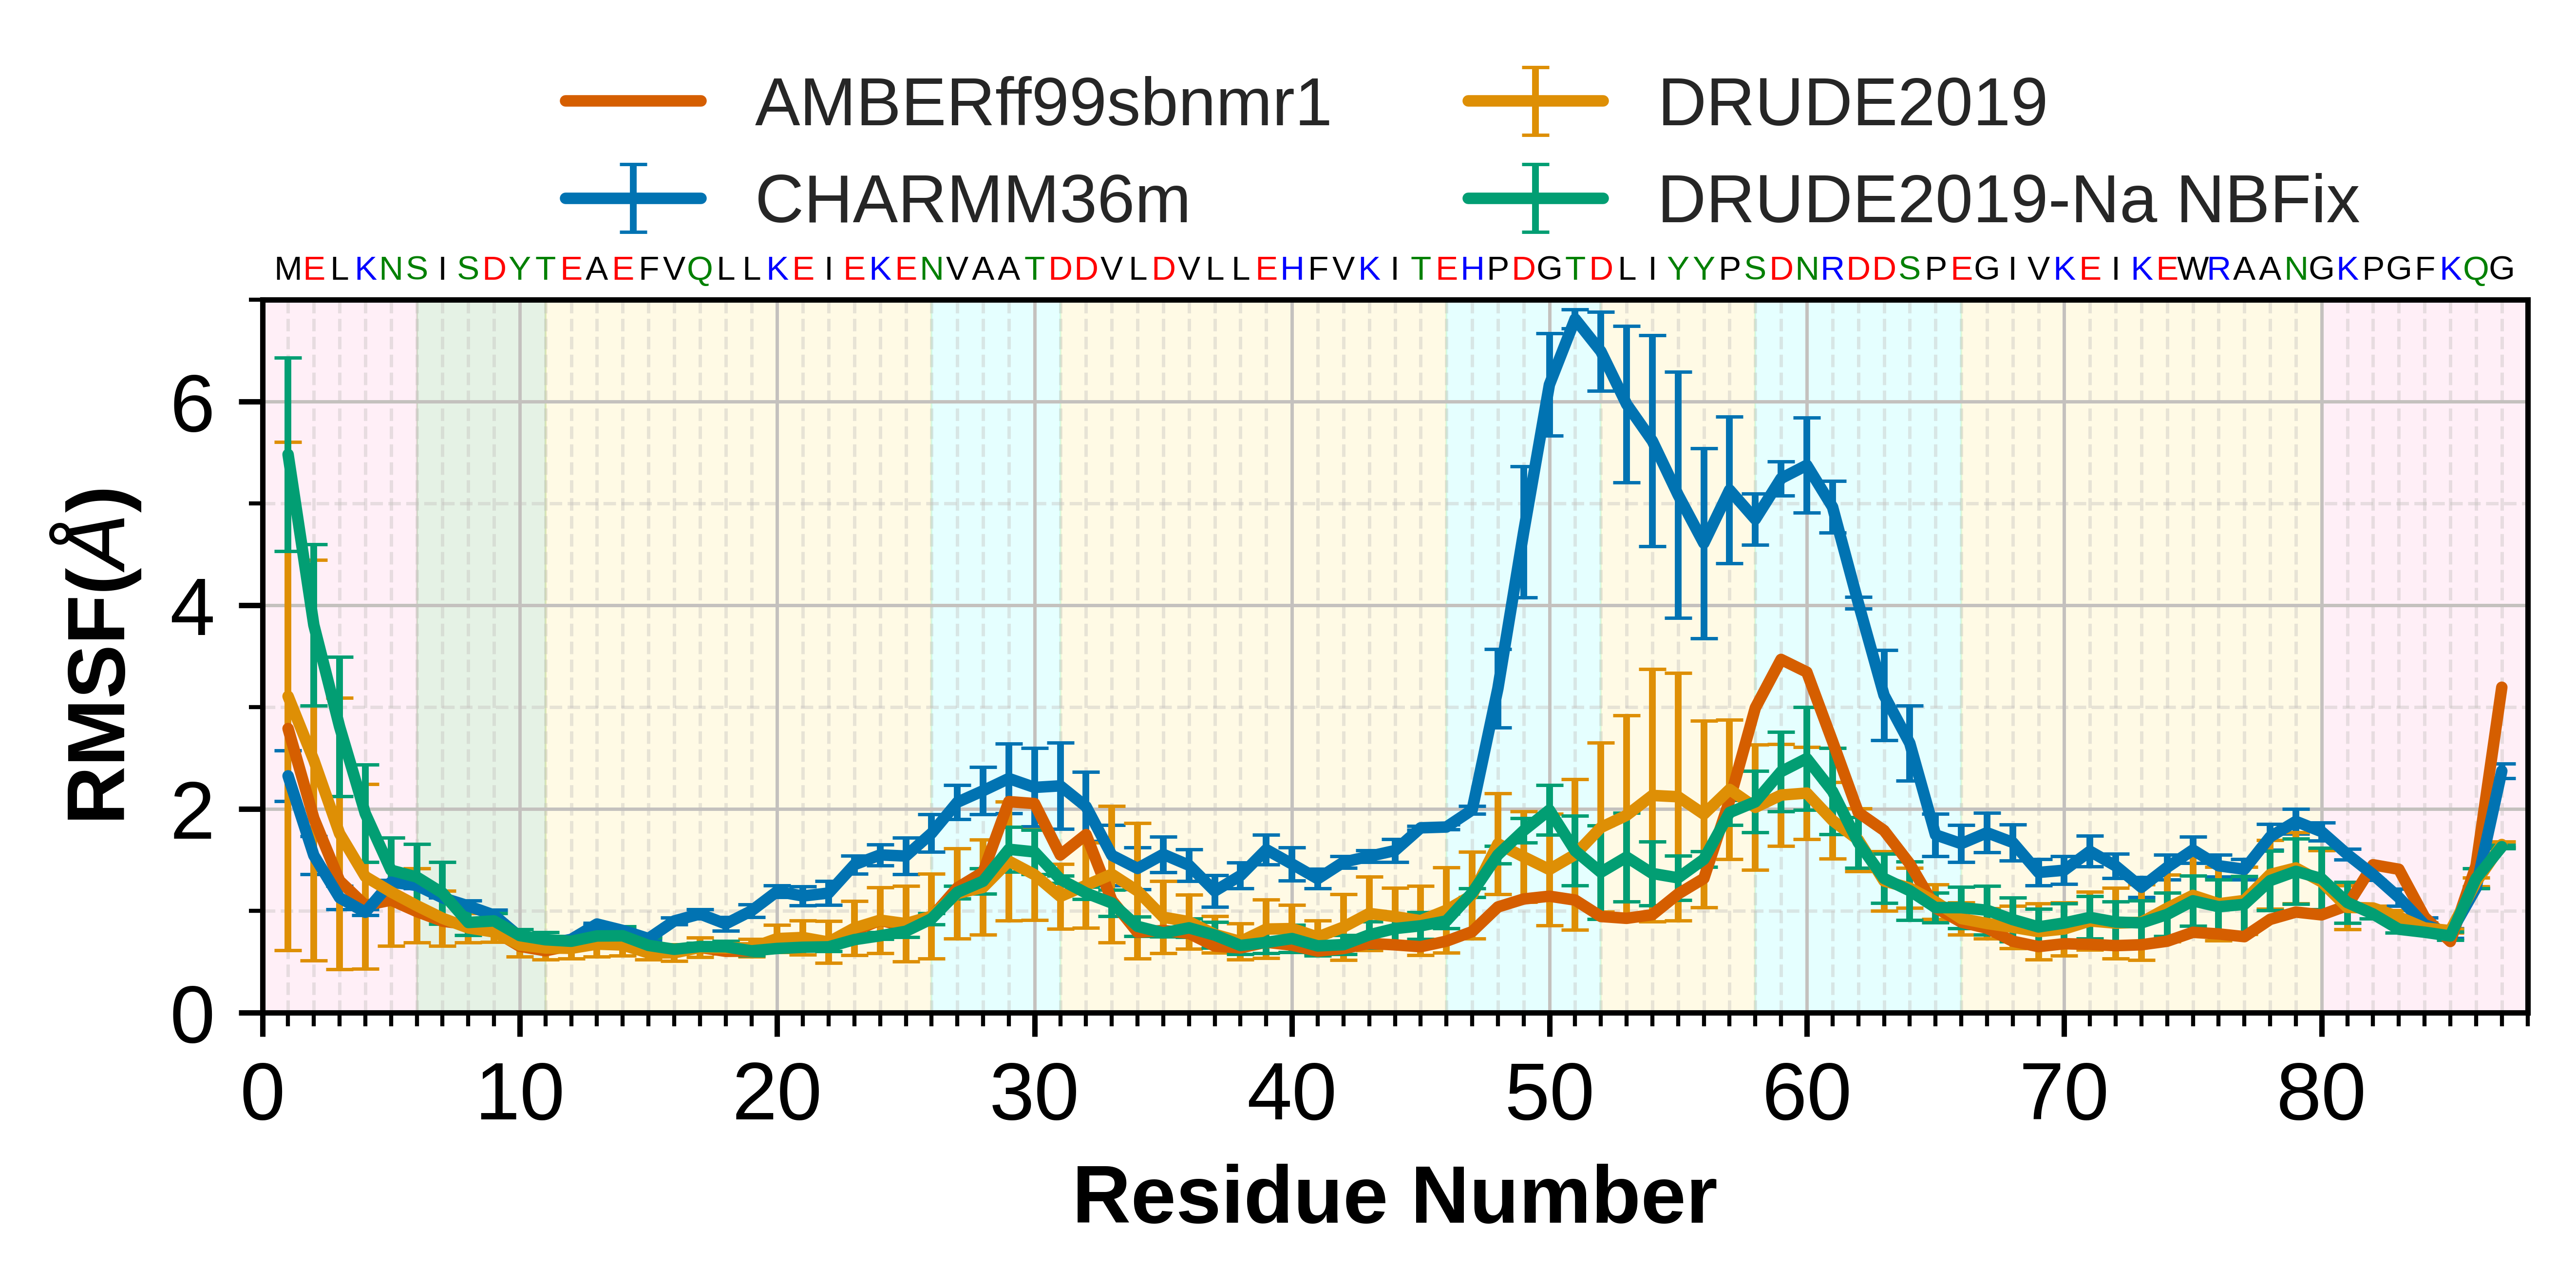

In [17]:
color_blind_palette = sns.color_palette("colorblind", 4)
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
plt.rcParams.update(plt.rcParamsDefault)
%matplotlib inline
fig, axs= plt.subplots(nrows=1,ncols=1,figsize=(6.0,1.9),dpi=1000)
#plt.rcParams["font.size"]=20
plt.style.use("seaborn-v0_8")
#plt.rcParams["errorbar.capsize"]=10
axs.errorbar(C36_s1_RMSF["resnum"],RMSF_C36,yerr=RMSF_C36_std,label="CHARMM36m",color=color_blind_palette[0],linewidth=1.7,ecolor=color_blind_palette[0],markersize="1.0",capsize=2,markeredgewidth=0.5, markeredgecolor="k",elinewidth=1.0)
axs.errorbar(C36_s1_RMSF["resnum"],RMSF_D19,yerr=RMSF_D19_std,label="DRUDE2019",color=color_blind_palette[1],linewidth=1.7,ecolor=color_blind_palette[1],markersize="1.0",capsize=2,markeredgewidth=0.5, markeredgecolor="k",elinewidth=1.0)
axs.errorbar(C36_s1_RMSF["resnum"],RMSF_D19n,yerr=RMSF_D19n_std,label="DRUDE2019-Na NBFix",color=color_blind_palette[2],linewidth=1.7,ecolor=color_blind_palette[2],markersize="1.0",capsize=2.0,markeredgewidth=0.5, markeredgecolor="k",elinewidth=1.0)
axs.plot(C36_s1_RMSF["resnum"],RMSF_Amber["rmsf"],label="AMBERff99sbnmr1",color=color_blind_palette[3],linewidth=1.7,)
axs.legend(fontsize=10, frameon=False, ncol=2, loc='upper center', bbox_to_anchor=(0.53, 1.4))

axs.axvspan(0,6,alpha=0.1,color="hotpink",)
axs.axvspan(80,88,alpha=0.1,color="hotpink")
axs.axvspan(11,26,alpha=0.1,color="gold")
axs.axvspan(31,46,alpha=0.1,color="gold")
axs.axvspan(52,58,alpha=0.1,color="gold")
axs.axvspan(66,80,alpha=0.1,color="gold")
axs.axvspan(26,31,alpha=0.1,color="cyan")
axs.axvspan(46,52,alpha=0.1,color="cyan")
axs.axvspan(58,66,alpha=0.1,color="cyan")
axs.axvspan(6,11,alpha=0.1,color="green")
# axs[i].tick_params(axis="x",which="minor",color="k",direction="out")
# axs[i].tick_params(axis='both', which='major', labelsize=25)
axs.set(
    #xlabel="Residue Number",
    #        ylabel=r"RMSF($\AA$)",
            xlim=[0,88],
            ylim=[0.0,7],
           #title="DRUDE using iRED"
              )
axs.set_xlabel("Residue Number",fontsize=12,fontweight="semibold")
axs.set_ylabel(r"RMSF($\AA$)",fontsize=12,fontweight="semibold")
axs.xaxis.set_major_locator(MultipleLocator(10))
axs.xaxis.set_minor_locator(MultipleLocator(1))
axs.yaxis.set_minor_locator(MultipleLocator(1))
axs.tick_params(axis="both",which="both",color="k",direction="out",labelsize=12)
axs.grid(visible=True,color='#C4C1BE', linestyle='-', linewidth=0.5, zorder=1)
axs.grid(which="minor",visible=True,color='#C4C1BE', linestyle='--', linewidth=0.5, zorder=1,alpha=0.4)

ax2 = axs.twiny()
ax2.set_xticks(C36_s1_RMSF["resnum"])  # Same positions as residue numbers
ax2.set_xlim(axs.get_xlim())
ax2.set_xticklabels(list(residue_dict.values()), fontsize=5)
# Define the residue dictionary and classification
aa_dict = {
    1: 'A',  # Alanine
    2: 'R',  # Arginine
    3: 'N',  # Asparagine
    4: 'D',  # Aspartic Acid
    5: 'C',  # Cysteine
    6: 'Q',  # Glutamine
    7: 'E',  # Glutamic Acid
    8: 'G',  # Glycine
    9: 'H',  # Histidine
    10: 'I', # Isoleucine
    11: 'L', # Leucine
    12: 'K', # Lysine
    13: 'M', # Methionine
    14: 'F', # Phenylalanine
    15: 'P', # Proline
    16: 'S', # Serine
    17: 'T', # Threonine
    18: 'W', # Tryptophan
    19: 'Y', # Tyrosine
    20: 'V'  # Valine
}

# Complete amino acid classification
amino_acid_classification = {
    'A': 'apolar',  # Alanine
    'R': 'basic',  # Arginine
    'N': 'polar uncharged',  # Asparagine
    'D': 'acidic',  # Aspartic Acid
    'C': 'polar uncharged',  # Cysteine
    'Q': 'polar uncharged',  # Glutamine
    'E': 'acidic',  # Glutamic Acid
    'G': 'apolar',  # Glycine
    'H': 'basic',  # Histidine
    'I': 'apolar',  # Isoleucine
    'L': 'apolar',  # Leucine
    'K': 'basic',  # Lysine
    'M': 'apolar',  # Methionine
    'F': 'apolar',  # Phenylalanine
    'P': 'apolar',  # Proline
    'S': 'polar uncharged',  # Serine
    'T': 'polar uncharged',  # Threonine
    'W': 'apolar',  # Tryptophan
    'Y': 'polar uncharged',  # Tyrosine
    'V': 'apolar'   # Valine
}

# Define colors based on classification
classification_colors = {
    'acidic': 'red',
    'basic': 'blue',
    'polar uncharged': 'green',
    'apolar': 'black'
}

# Set the x-tick labels with corresponding colors
for tick in ax2.get_xticklabels():
    residue_name = tick.get_text()
    tick_color = classification_colors[amino_acid_classification.get(residue_name)]
    tick.set_color(tick_color)

# Set the labels for the upper x-axis
#ax2.set_xticklabels(list(residue_dict.values()), fontsize=5)
ax2.tick_params(axis='x', which='both', pad=2)
ax2.grid(False)
#axs.legend(fontsize=8,frameon=True,bbox_to_anchor=(1, 1))
#axs.grid(visible=True)
#fig.subplots_adjust(top=0.9)
fig.savefig("plots/Fig1B_RMSF_N.png",dpi=1000,bbox_inches="tight",pad_inches=0.002)

# Figure 1 secondary structure evolution

In [20]:
AA_dssp=np.load(f"{C36_loc}dssp/set1/dssp_all_prot.npy",allow_pickle=True)
D19_dssp=np.load(f"{D19_loc}dssp/set1/dssp_all_prot.npy",allow_pickle=True)

structure_mapping = {'H': 0, 'G': 1, 'I': 2, 'B': 3, 'E': 4, 'T': 5, 'S': 6, ' ': 7} 
numeric_AA_dssp = np.vectorize(structure_mapping.get)(AA_dssp.T)
numeric_D19_dssp = np.vectorize(structure_mapping.get)(D19_dssp.T)
numeric_AA_dssp = np.vstack([np.nan * np.ones((1, numeric_AA_dssp.shape[1])), numeric_AA_dssp])  
numeric_D19_dssp = np.vstack([np.nan * np.ones((1, numeric_D19_dssp.shape[1])), numeric_D19_dssp])  

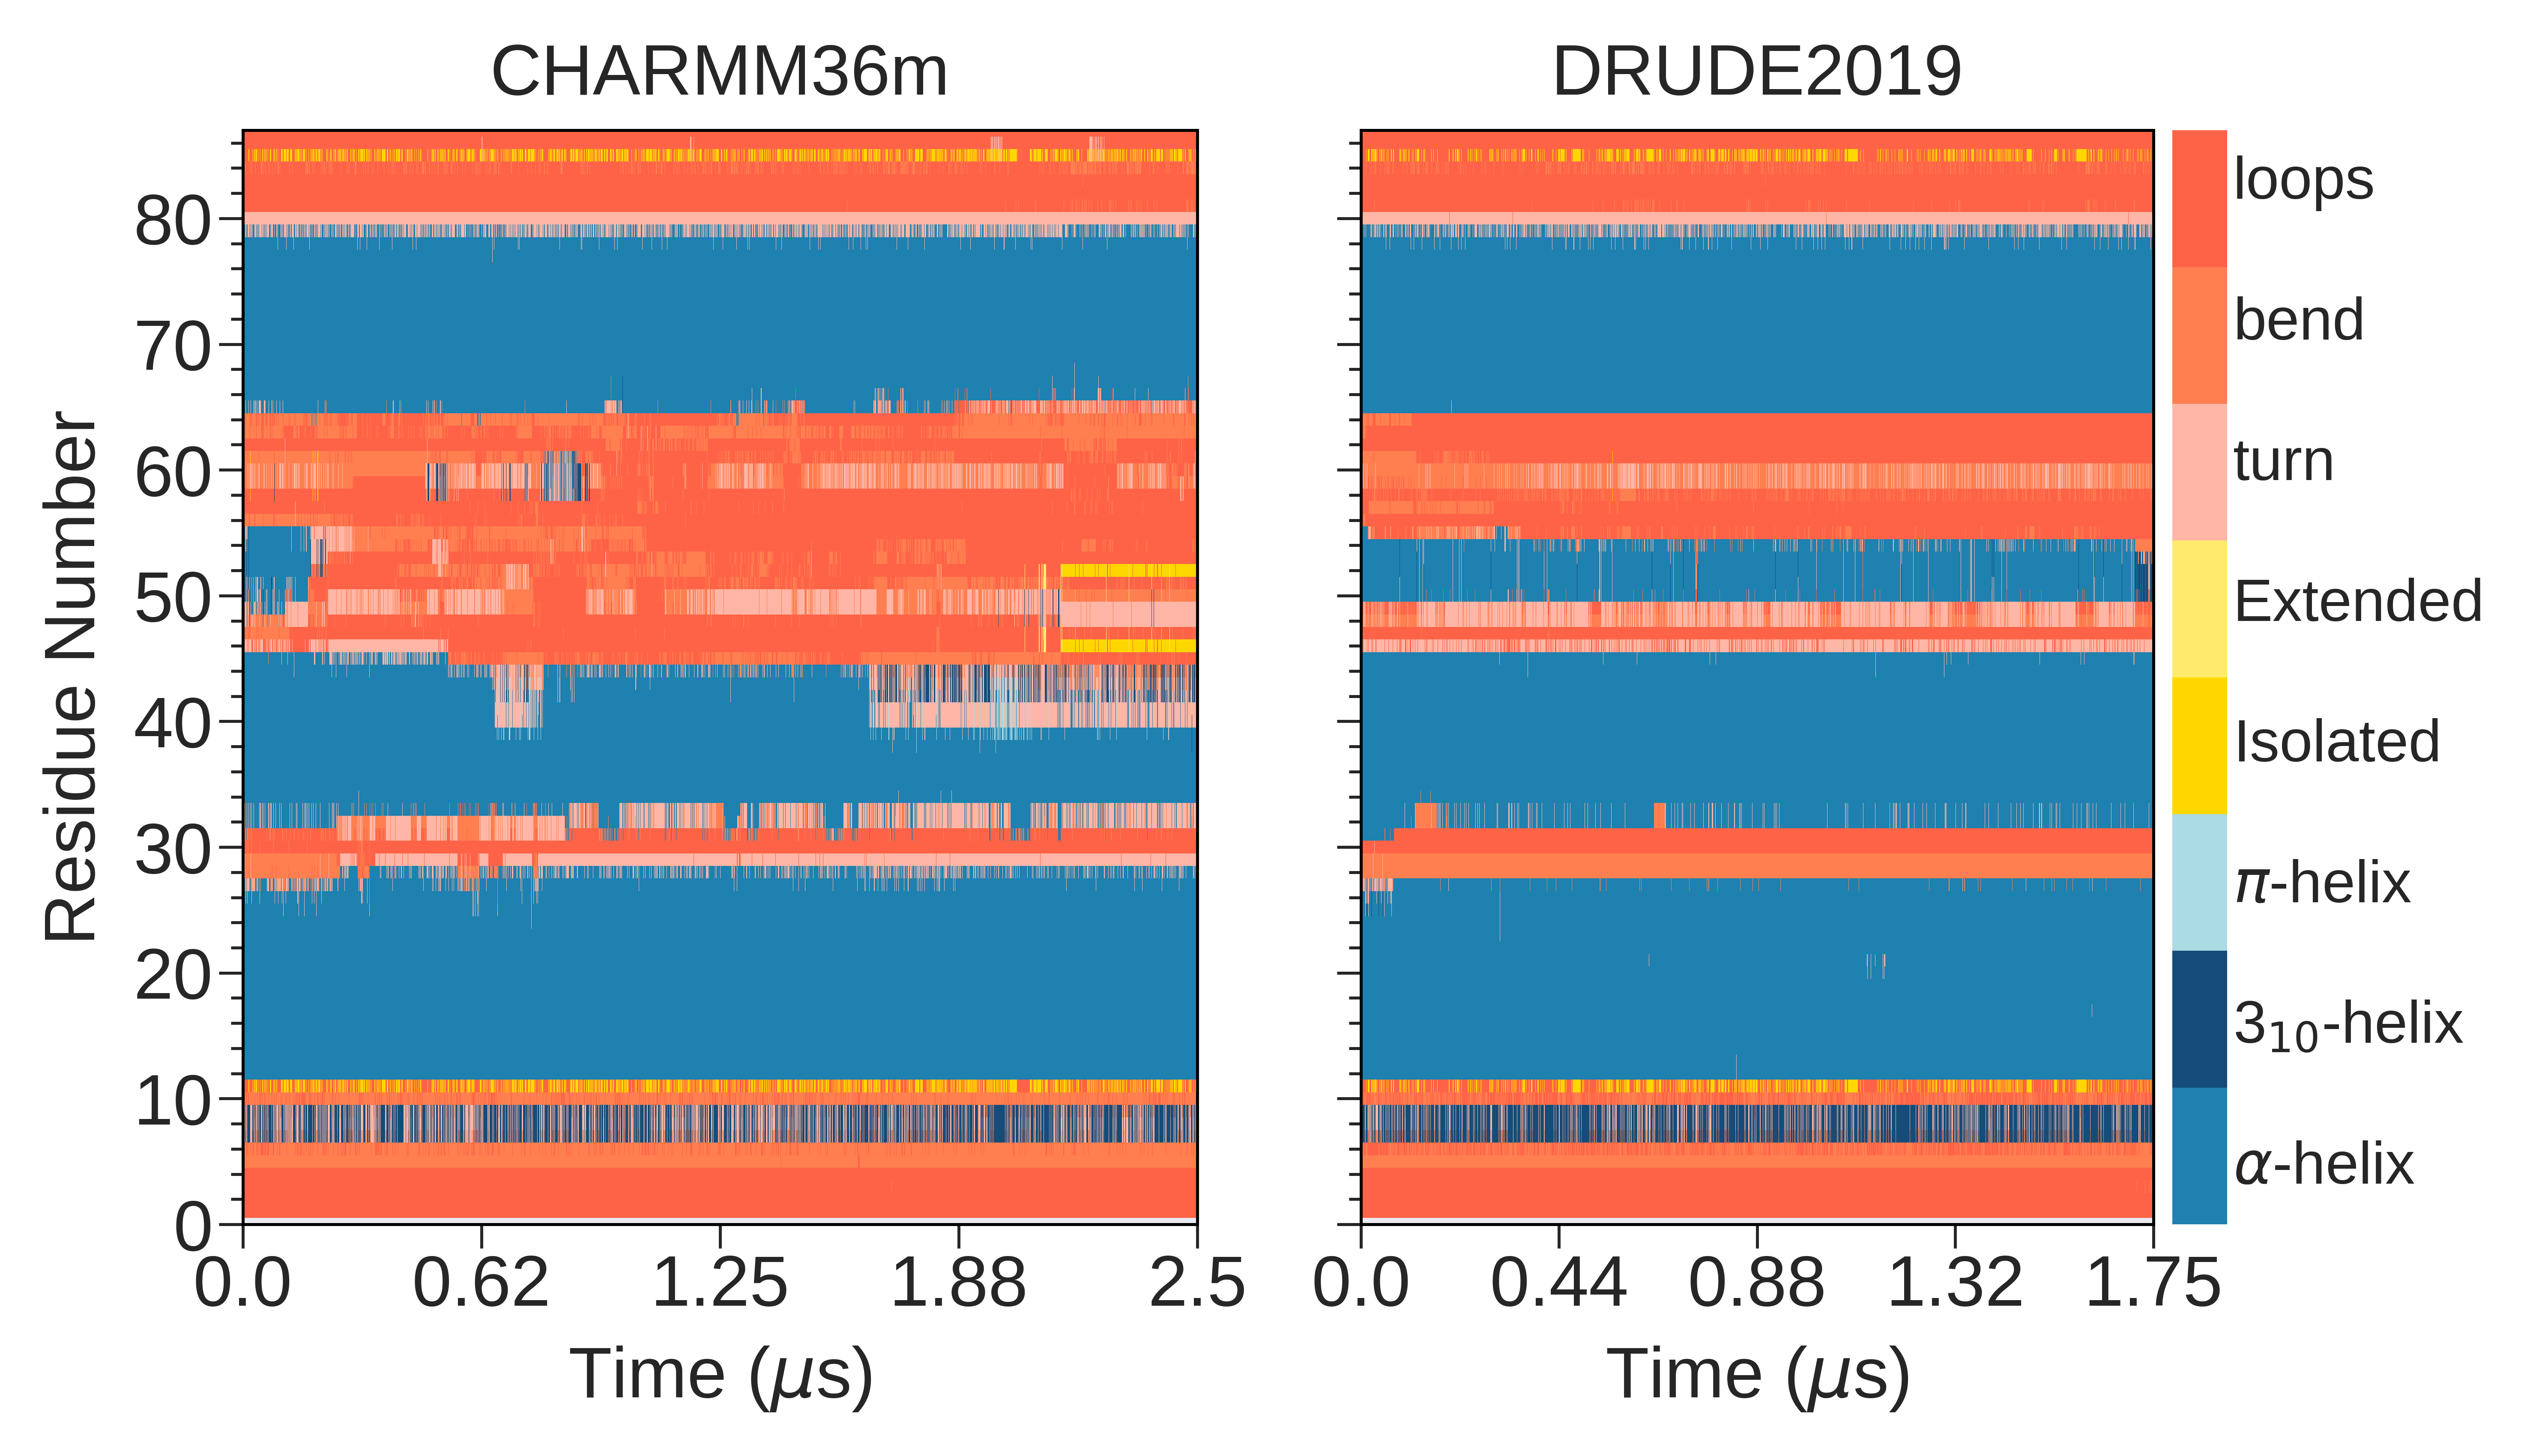

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm

colors = [
    "#1e81b0",  
    "#154c79",  
    "#abdbe3",  
    "#FFD700", 
    "#FFEA6D",  
    "#FFB6A6",  
    "#FF7F50",  
    "#FF6347"  
]
cmap = ListedColormap(colors)


boundaries = np.arange(0, 9) 
norm = BoundaryNorm(boundaries, cmap.N, clip=True)

num_frames_C36 = numeric_AA_dssp.shape[1]
num_frames_D19 = numeric_D19_dssp.shape[1]

time_values_C36 = np.arange(num_frames_C36) * 20 / 1e6  # Time in microseconds
time_values_D19 = np.arange(num_frames_D19) * 20 / 1e6  # Time in microseconds

fig, axs= plt.subplots(nrows=1,ncols=2,figsize=(6.0,3.5),dpi=1000,layout="tight",sharey=True)

img1 = axs[0].imshow(numeric_AA_dssp, aspect='auto', cmap=cmap, interpolation='nearest')
img2 = axs[1].imshow(numeric_D19_dssp, aspect='auto', cmap=cmap, interpolation='nearest')

xtick_positions_C36 = np.linspace(0, num_frames_C36 - 1, num=5, dtype=int)  
xtick_labels_C36 = np.round(time_values_C36[xtick_positions_C36], 2)  

xtick_positions_D19 = np.linspace(0, num_frames_D19 - 1, num=5, dtype=int)  
xtick_labels_D19 = np.round(time_values_D19[xtick_positions_D19], 2)  

axs[0].set_xticks(xtick_positions_C36, xtick_labels_C36)
axs[0].set_yticks(np.arange(0, 88, 10), np.arange(0, 88, 10))  
axs[1].set_xticks(xtick_positions_D19, xtick_labels_D19)
axs[1].set_yticks(np.arange(0, 88, 10), np.arange(0, 88, 10))  


axs[0].yaxis.set_minor_locator(MultipleLocator(2))
axs[1].yaxis.set_minor_locator(MultipleLocator(2))
axs[0].set_ylim(0,87)  
axs[1].set_ylim(0,87) 
axs[0].tick_params(axis='both', labelsize=12, direction='out', size=4, width=0.5, pad=1)
axs[0].tick_params(axis='y', which='minor', size=2)  # Customize minor tick size on y-axis
axs[1].tick_params(axis='both', labelsize=12, direction='out', size=4, width=0.5, pad=1)
axs[1].tick_params(axis='y', which='minor', size=2)  # Customize minor tick size on y-axis



axs[0].set_xlabel('Time ($\mu$s)', fontsize=12)
axs[0].set_ylabel('Residue Number', fontsize=12)

axs[1].tick_params(axis='both', labelsize=12, direction='out',size=4,width=0.5,pad=1)  # Tick marks outside

axs[1].set_xlabel(r'Time ($\mu$s)', fontsize=12)

cbar = fig.colorbar(img2, orientation='vertical', pad=0.02)
cbar.set_ticks(np.array([0,0.9,1.8,2.7,3.6,4.5,5.4,6.3])+0.4)
cbar.set_ticklabels([r'$\alpha$-helix', r'3$_{10}$-helix', r'$\pi$-helix', 'Isolated', 'Extended', 'turn', 'bend', 'loops'])
cbar.ax.tick_params(labelsize=10, pad=1)

for spine in axs[0].spines.values():
    spine.set_color('black')
    spine.set_linewidth(0.5)  
    
for spine in axs[1].spines.values():
    spine.set_color('black')
    spine.set_linewidth(0.5) 

axs[0].grid(False)
axs[1].grid(False)
axs[0].set_title("CHARMM36m",fontsize=12,)
axs[1].set_title("DRUDE2019",fontsize=12,)

# axs[0].invert_yaxis()
# axs[1].invert_yaxis()


fig.savefig("plots/Fig1D_sec_str_evol_C36_D19.png",dpi=1000,bbox_inches='tight',pad_inches=0.05)

# Figure 2: $S^2$ order parameter plot

In [23]:
S2_NASR=np.loadtxt("/projectnb/cui-buchem/sangram/Im7_simulation/AmberNMR2_ff_Rafael/analysis/Im7_NASR_S2_sci_adv.txt",skiprows=1,)
Tired=[1,5,10,25,50,100,250,500,1000]
col=["resid"]+Tired
S2_NASR=pd.DataFrame(S2_NASR,columns=["resid","S2avg","S2_SD"])

In [28]:
C36m_iRED_1=np.loadtxt(f"{C36_loc}iRED_S2/set1/iRED_S2.dat")
C36m_iRED_2=np.loadtxt(f"{C36_loc}iRED_S2/set2/iRED_S2.dat")

D19_iRED_1=np.loadtxt(f"{D19_loc}iRED_S2/set1/iRED_S2.dat")
D19_iRED_2=np.loadtxt(f"{D19_loc}iRED_S2/set2/iRED_S2.dat")
D19_iRED_3=np.loadtxt(f"{D19_loc}iRED_S2/set3/iRED_S2.dat")

D19n_iRED_1=np.loadtxt(f"{D19n_loc}iRED_S2/set1/iRED_S2.dat")
D19n_iRED_2=np.loadtxt(f"{D19n_loc}iRED_S2/set2/iRED_S2.dat")
D19n_iRED_3=np.loadtxt(f"{D19n_loc}iRED_S2/set3/iRED_S2.dat")


Amber_iRED=pd.DataFrame(np.loadtxt(f"{Amber_loc}iRED_S2/iRED_S2_order_parameter.dat"),columns=col)

In [29]:
C36m_iRED=np.zeros(np.shape(C36m_iRED_1))
C36m_iRED[:,0]=C36m_iRED_1[:,0]
C36m_iRED[:,1:]=(C36m_iRED_1[:,1:]+C36m_iRED_2[:,1:])/2
C36m_iRED=pd.DataFrame(C36m_iRED,columns=col)

D19_iRED=np.zeros(np.shape(D19_iRED_1))
D19_iRED[:,0]=D19_iRED_1[:,0]
D19_iRED[:,1:]=(D19_iRED_1[:,1:]+D19_iRED_2[:,1:]+D19_iRED_3[:,1:])/3
D19_iRED=pd.DataFrame(D19_iRED,columns=col)

D19n_iRED=np.zeros(np.shape(D19n_iRED_1))
D19n_iRED[:,0]=D19n_iRED_1[:,0]
D19n_iRED[:,1:]=(D19n_iRED_1[:,1:]+D19n_iRED_2[:,1:]+D19n_iRED_3[:,1:])/3
D19n_iRED=pd.DataFrame(D19n_iRED,columns=col)


In [30]:
def hex_to_RGB(hex_str):
    """ #FFFFFF -> [255,255,255]"""
    #Pass 16 to the integer function for change of base
    return [int(hex_str[i:i+2], 16) for i in range(1,6,2)]

def get_color_gradient(c1, c2, n):
    """
    Given two hex colors, returns a color gradient
    with n colors.
    """
    assert n > 1
    c1_rgb = np.array(hex_to_RGB(c1))/255
    c2_rgb = np.array(hex_to_RGB(c2))/255
    mix_pcts = [x/(n-1) for x in range(n)]
    rgb_colors = [((1-mix)*c1_rgb + (mix*c2_rgb)) for mix in mix_pcts]
    return ["#" + "".join([format(int(round(val*255)), "02x") for val in item]) for item in rgb_colors]

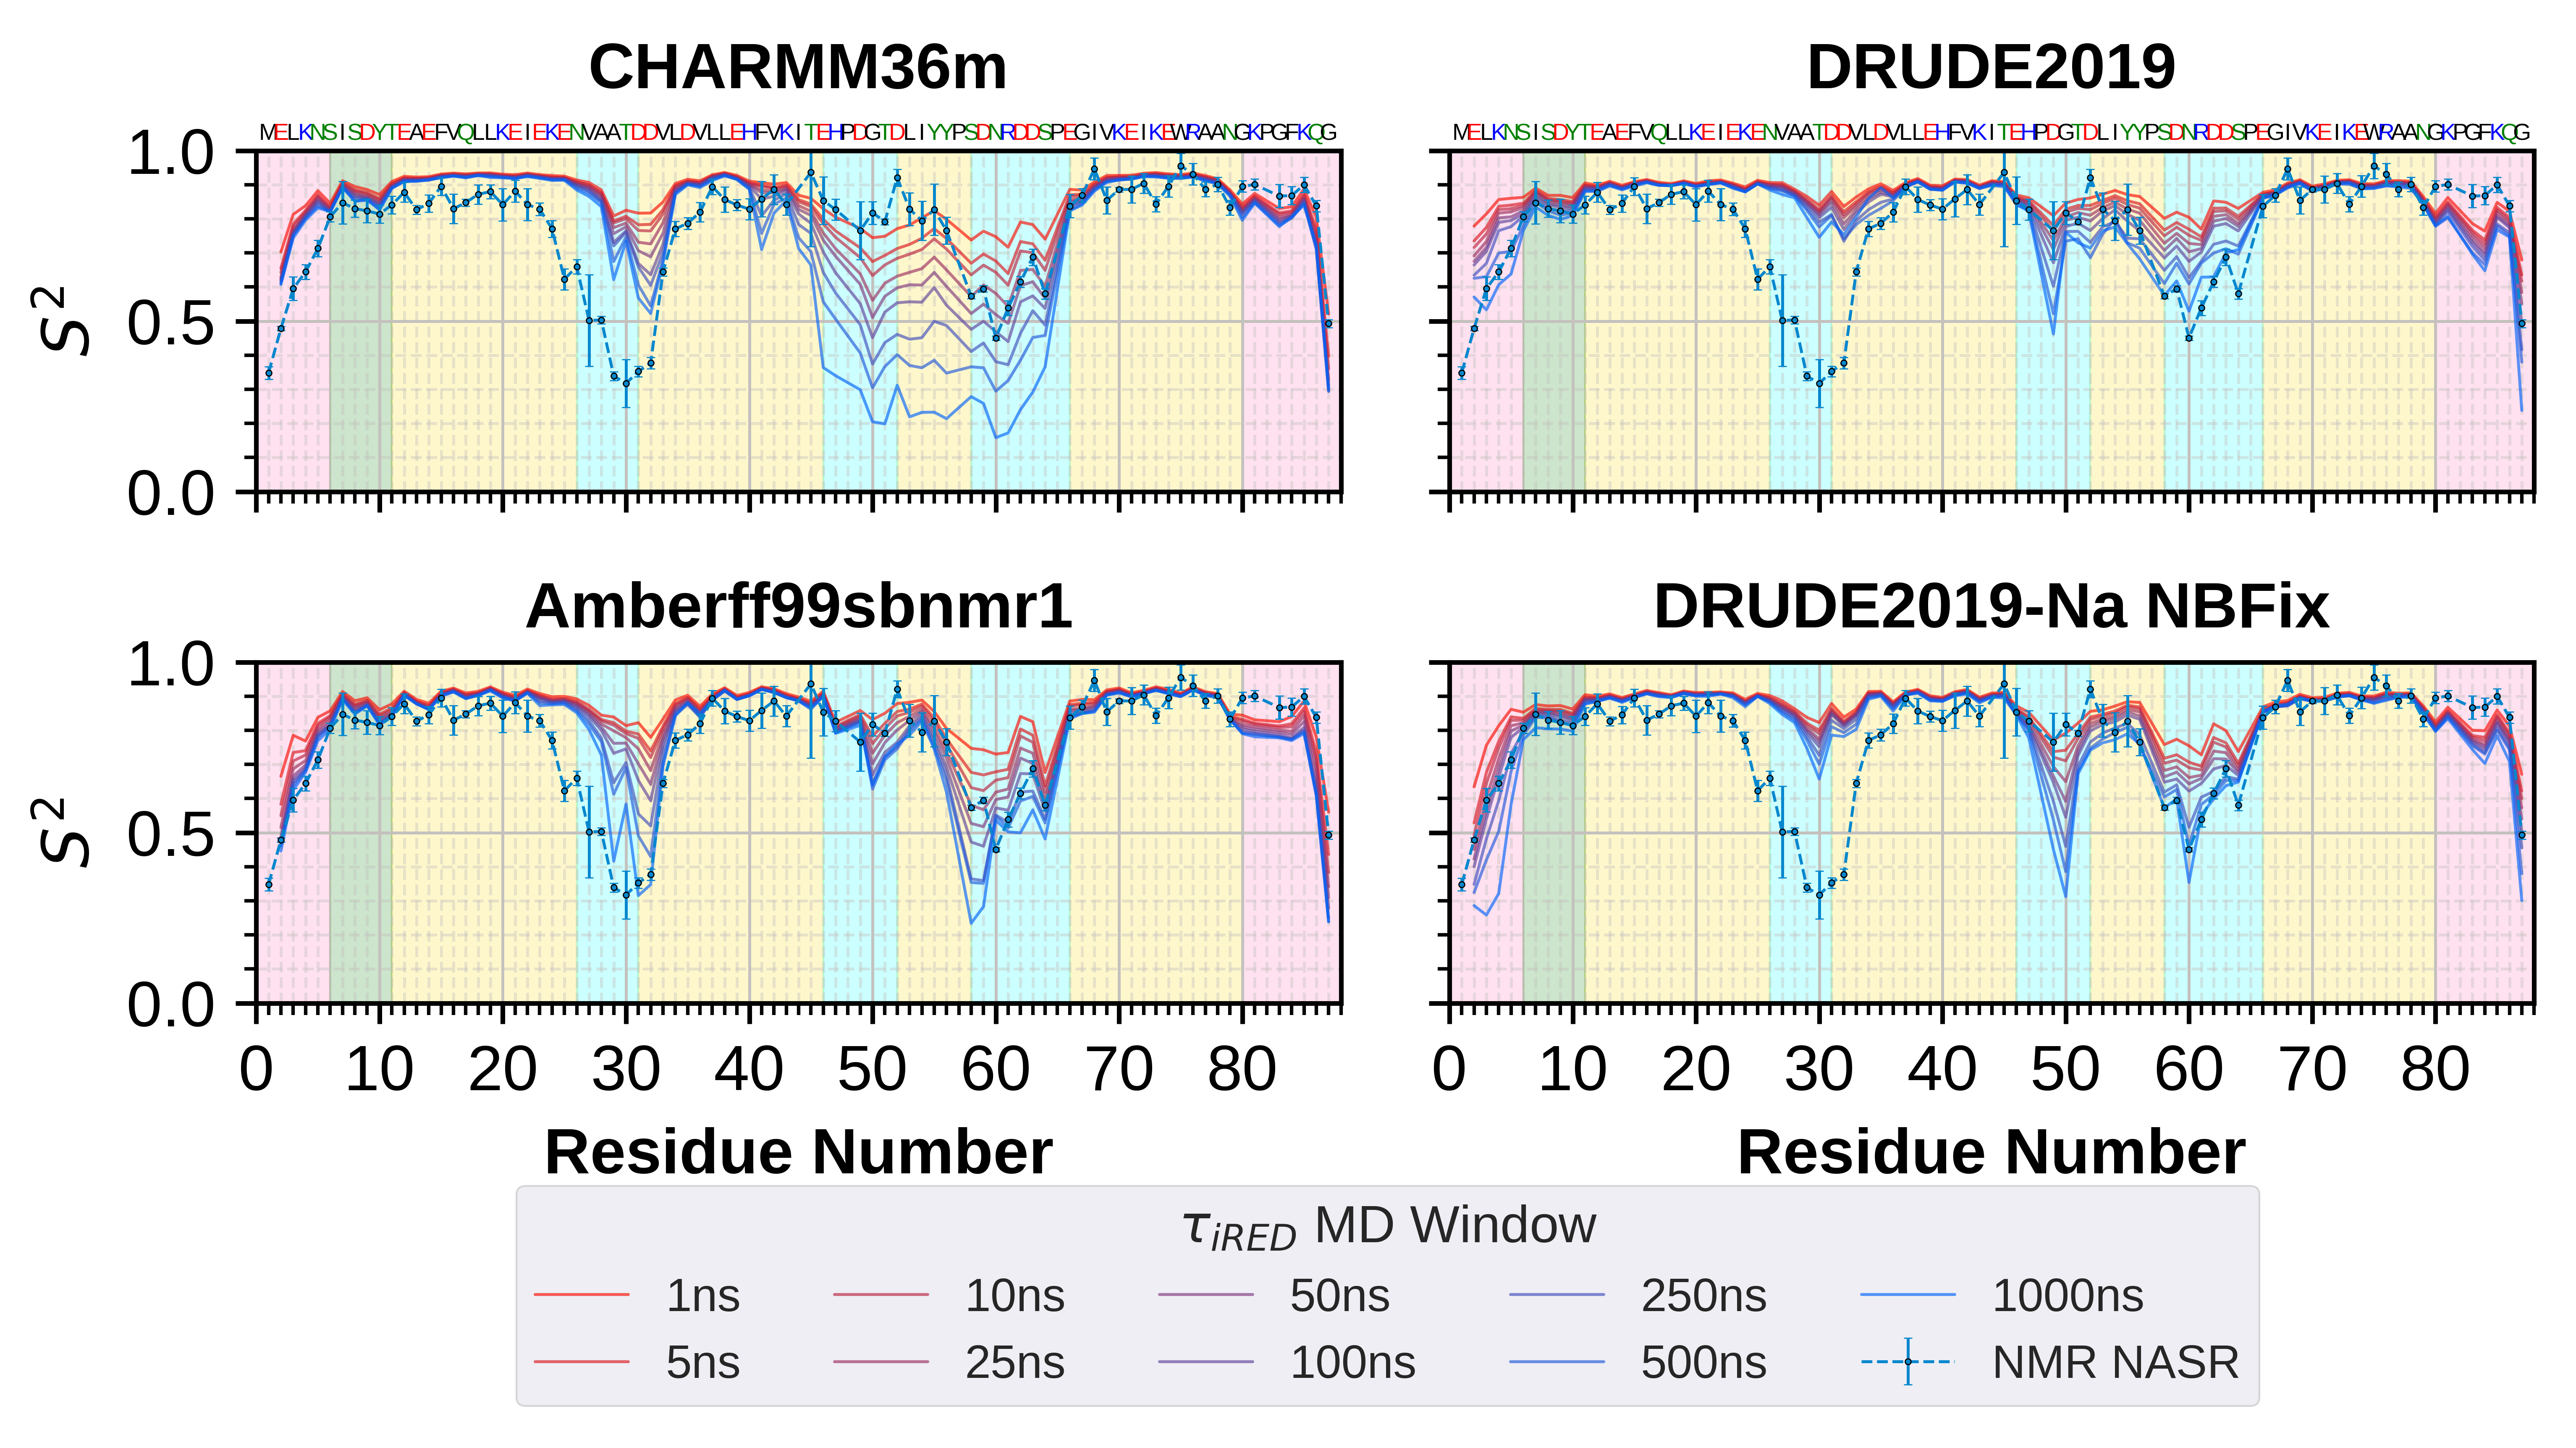

In [33]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
color1 = "#FA0D02"
color2 = "#0264FA"
clr=get_color_gradient(color1, color2, len(Tired))
plt.rcParams.update(plt.rcParamsDefault)
%matplotlib inline
fig, axs= plt.subplots(nrows=2,ncols=2,figsize=(7.0,3.5),dpi=1000,sharex=True, sharey=True)
axs=axs.flatten()
plt.rcParams["font.size"]=9
plt.style.use("seaborn-v0_8")
#plt.rcParams["errorbar.capsize"]=10
#axs=axs.flatten()
ff=["CHARMM36m","DRUDE2019","Amberff99sbnmr1","DRUDE2019-Na NBFix"]
for n,i in enumerate(Tired):
    axs[0].plot(C36m_iRED["resid"],C36m_iRED[i],color=clr[n],lw=0.5,alpha=0.65,label=f"{i}ns")
    axs[1].plot(D19_iRED["resid"],D19_iRED[i],color=clr[n],lw=0.5,alpha=0.65)
    axs[3].plot(D19n_iRED["resid"],D19n_iRED[i],color=clr[n],lw=0.5,alpha=0.65)
    axs[2].plot(Amber_iRED["resid"],Amber_iRED[i],color=clr[n],lw=0.5,alpha=0.65)
    #axs[1].plot(S2_charmm36_iRED["resid"],S2_charmm36_iRED[i],label=f"{i}ns",color=clr[n],lw=1.2,alpha=0.65)

for i in range(4):
    if i == 0:
        axs[i].errorbar(S2_NASR["resid"],S2_NASR['S2avg'],yerr=S2_NASR['S2_SD'],ecolor="#0587CE",marker=".",markersize="2.0",c="#0587CE",lw=0.5,ls="--",capsize=0.75,label="NMR NASR",markeredgewidth=0.2, markeredgecolor="k")
    else:
        axs[i].errorbar(S2_NASR["resid"],S2_NASR['S2avg'],yerr=S2_NASR['S2_SD'],ecolor="#0587CE",marker=".",markersize="2.0",c="#0587CE",lw=0.5,ls="--",capsize=0.75,markeredgewidth=0.2, markeredgecolor="k")
    axs[i].axvspan(0,6,alpha=0.2,color="hotpink")#,label="Terminal")
    axs[i].axvspan(80,88,alpha=0.2,color="hotpink")
    axs[i].axvspan(11,26,alpha=0.2,color="gold")#,label=rf"$\alpha$-helix")
    axs[i].axvspan(31,46,alpha=0.2,color="gold")
    axs[i].axvspan(52,58,alpha=0.2,color="gold")
    axs[i].axvspan(66,80,alpha=0.2,color="gold")
    axs[i].axvspan(26,31,alpha=0.2,color="cyan")#,label="loop")
    axs[i].axvspan(46,52,alpha=0.2,color="cyan")
    axs[i].axvspan(58,66,alpha=0.2,color="cyan")
    axs[i].axvspan(6,11,alpha=0.2,color="green")#,label=rf"helix$3_{10}$")
    #axs.plot(resid,rmsf_p.results["rmsf"],label="DRUDE",color="tab:orange",marker=".",markersize=10)
# axs[j].set(xlabel="Residue Number",
#         ylabel=r"$S^2$",
#         xlim=[0,88],
#         ylim=[0.0,1],
#        #title="DRUDE using iRED"
#           )
    axs[i].set(xlim=[0,88], ylim=[0.0,1.0])
    axs[i].xaxis.set_major_locator(MultipleLocator(10))
    axs[i].xaxis.set_minor_locator(MultipleLocator(1))
    axs[i].yaxis.set_minor_locator(MultipleLocator(0.1))
    axs[i].grid(visible=True,color='#C4C1BE', linestyle='-', linewidth=0.5, zorder=1)
    axs[i].grid(which="minor",visible=True,color='#C4C1BE', linestyle='--', linewidth=0.5, zorder=1,alpha=0.4)
    axs[i].tick_params(axis="x",which="minor",color="k",direction="out")
    axs[i].tick_params(axis='both', which='major', labelsize=11)
    #axs[j].legend(title="$T_{iRED}$",fontsize=8,frameon=False,bbox_to_anchor=(1, 1),title_fontsize=10)
    axs[i].grid(visible=True)
    axs[i].set_title(ff[i],fontsize=11,fontweight="semibold")
#axs.set_ylabel(r"$S^2$",fontsize=25,fontweight="bold")
fig.subplots_adjust(bottom=0.3,wspace=0.1,hspace=0.5)
fig.legend(title="$\\tau_{iRED}$"+" MD Window",fontsize=8,frameon=True,bbox_to_anchor=(0.51, 0.01),loc="lower center",title_fontsize=9,ncols=5)
#fig.legend(title="$\\tau_{iRED}$"+" MD Window",fontsize=12,frameon=True,bbox_to_anchor=(0.5, 0.0),loc="lower center",title_fontsize=20,ncols=5)

axs[2].set_xlabel(r"Residue Number",fontsize=11,fontweight="bold")
axs[3].set_xlabel(r"Residue Number",fontsize=11,fontweight="bold")

axs[0].set_ylabel(r"$S^2$",fontsize=11,fontweight="bold")
axs[2].set_ylabel(r"$S^2$",fontsize=11,fontweight="bold")

aa_dict = {
    1: 'A',  # Alanine
    2: 'R',  # Arginine
    3: 'N',  # Asparagine
    4: 'D',  # Aspartic Acid
    5: 'C',  # Cysteine
    6: 'Q',  # Glutamine
    7: 'E',  # Glutamic Acid
    8: 'G',  # Glycine
    9: 'H',  # Histidine
    10: 'I', # Isoleucine
    11: 'L', # Leucine
    12: 'K', # Lysine
    13: 'M', # Methionine
    14: 'F', # Phenylalanine
    15: 'P', # Proline
    16: 'S', # Serine
    17: 'T', # Threonine
    18: 'W', # Tryptophan
    19: 'Y', # Tyrosine
    20: 'V'  # Valine
}

# Complete amino acid classification
amino_acid_classification = {
    'A': 'apolar',  # Alanine
    'R': 'basic',  # Arginine
    'N': 'polar uncharged',  # Asparagine
    'D': 'acidic',  # Aspartic Acid
    'C': 'polar uncharged',  # Cysteine
    'Q': 'polar uncharged',  # Glutamine
    'E': 'acidic',  # Glutamic Acid
    'G': 'apolar',  # Glycine
    'H': 'basic',  # Histidine
    'I': 'apolar',  # Isoleucine
    'L': 'apolar',  # Leucine
    'K': 'basic',  # Lysine
    'M': 'apolar',  # Methionine
    'F': 'apolar',  # Phenylalanine
    'P': 'apolar',  # Proline
    'S': 'polar uncharged',  # Serine
    'T': 'polar uncharged',  # Threonine
    'W': 'apolar',  # Tryptophan
    'Y': 'polar uncharged',  # Tyrosine
    'V': 'apolar'   # Valine
}

classification_colors = {
    'acidic': 'red',
    'basic': 'blue',
    'polar uncharged': 'green',
    'apolar': 'black'
}

ax0 = axs[0].twiny()
ax0.set_xticks(np.arange(1,88))  
ax0.set_xlim(axs[0].get_xlim())
ax0.set_xticklabels(list(residue_dict.values()), fontsize=4)


for tick in ax0.get_xticklabels():
    residue_name = tick.get_text()
    tick_color = classification_colors[amino_acid_classification.get(residue_name)]
    tick.set_color(tick_color)

#ax2.set_xticklabels(list(residue_dict.values()), fontsize=5)
ax0.tick_params(axis='x', which='both', pad=1)
ax0.grid(False)

ax1 = axs[1].twiny()
ax1.set_xticks(np.arange(1,88)) 
ax1.set_xlim(axs[1].get_xlim())
ax1.set_xticklabels(list(residue_dict.values()), fontsize=4)


for tick in ax1.get_xticklabels():
    residue_name = tick.get_text()
    tick_color = classification_colors[amino_acid_classification.get(residue_name)]
    tick.set_color(tick_color)

#ax2.set_xticklabels(list(residue_dict.values()), fontsize=5)
ax1.tick_params(axis='x', which='both', pad=1)
ax1.grid(False)

fig.savefig("plots/Fig2_S2_NMR_order_parameter.png",dpi=1000,bbox_inches='tight',pad_inches=0.05)

# Figure 3: RMSD in dihedral space for loop I region

In [36]:
phi_RMSD_file="rmsd_phi_prot_resid23-34.npy"
psi_RMSD_file="rmsd_psi_prot_resid23-34.npy"

C36_phi_s1_RMSD=np.load(f"{C36_loc}dihedral_RMSD/set1/{phi_RMSD_file}")
C36_phi_s2_RMSD=np.load(f"{C36_loc}dihedral_RMSD/set2/{phi_RMSD_file}")
C36_psi_s1_RMSD=np.load(f"{C36_loc}dihedral_RMSD/set1/{psi_RMSD_file}")
C36_psi_s2_RMSD=np.load(f"{C36_loc}dihedral_RMSD/set2/{psi_RMSD_file}")

Amber_phi_RMSD=np.load(f"{Amber_loc}dihedral_RMSD/{phi_RMSD_file}")
Amber_psi_RMSD=np.load(f"{Amber_loc}dihedral_RMSD/{psi_RMSD_file}")

D19_phi_s1_RMSD=np.load(f"{D19_loc}dihedral_RMSD/set1/{phi_RMSD_file}")
D19_phi_s2_RMSD=np.load(f"{D19_loc}dihedral_RMSD/set2/{phi_RMSD_file}")
D19_phi_s3_RMSD=np.load(f"{D19_loc}dihedral_RMSD/set3/{phi_RMSD_file}")
D19_psi_s1_RMSD=np.load(f"{D19_loc}dihedral_RMSD/set1/{psi_RMSD_file}")
D19_psi_s2_RMSD=np.load(f"{D19_loc}dihedral_RMSD/set2/{psi_RMSD_file}")
D19_psi_s3_RMSD=np.load(f"{D19_loc}dihedral_RMSD/set3/{psi_RMSD_file}")

D19n_phi_s1_RMSD=np.load(f"{D19n_loc}dihedral_RMSD/set1/{phi_RMSD_file}")
D19n_phi_s2_RMSD=np.load(f"{D19n_loc}dihedral_RMSD/set2/{phi_RMSD_file}")
D19n_phi_s3_RMSD=np.load(f"{D19n_loc}dihedral_RMSD/set3/{phi_RMSD_file}")
D19n_psi_s1_RMSD=np.load(f"{D19n_loc}dihedral_RMSD/set1/{psi_RMSD_file}")
D19n_psi_s2_RMSD=np.load(f"{D19n_loc}dihedral_RMSD/set2/{psi_RMSD_file}")
D19n_psi_s3_RMSD=np.load(f"{D19n_loc}dihedral_RMSD/set3/{psi_RMSD_file}")

In [37]:
C36_phi_RMSD=np.concatenate((C36_phi_s1_RMSD[:,1],C36_phi_s2_RMSD[:,1]))
C36_psi_RMSD=np.concatenate((C36_psi_s1_RMSD[:,1],C36_psi_s2_RMSD[:,1]))

D19_phi_RMSD=np.concatenate((D19_phi_s1_RMSD[:,1],D19_phi_s2_RMSD[:,1],D19_phi_s3_RMSD[:,1]))
D19_psi_RMSD=np.concatenate((D19_psi_s1_RMSD[:,1],D19_psi_s2_RMSD[:,1],D19_psi_s3_RMSD[:,1]))

D19n_phi_RMSD=np.concatenate((D19n_phi_s1_RMSD[:,1],D19n_phi_s2_RMSD[:,1],D19n_phi_s3_RMSD[:,1]))
D19n_psi_RMSD=np.concatenate((D19n_psi_s1_RMSD[:,1],D19n_psi_s2_RMSD[:,1],D19n_psi_s3_RMSD[:,1]))

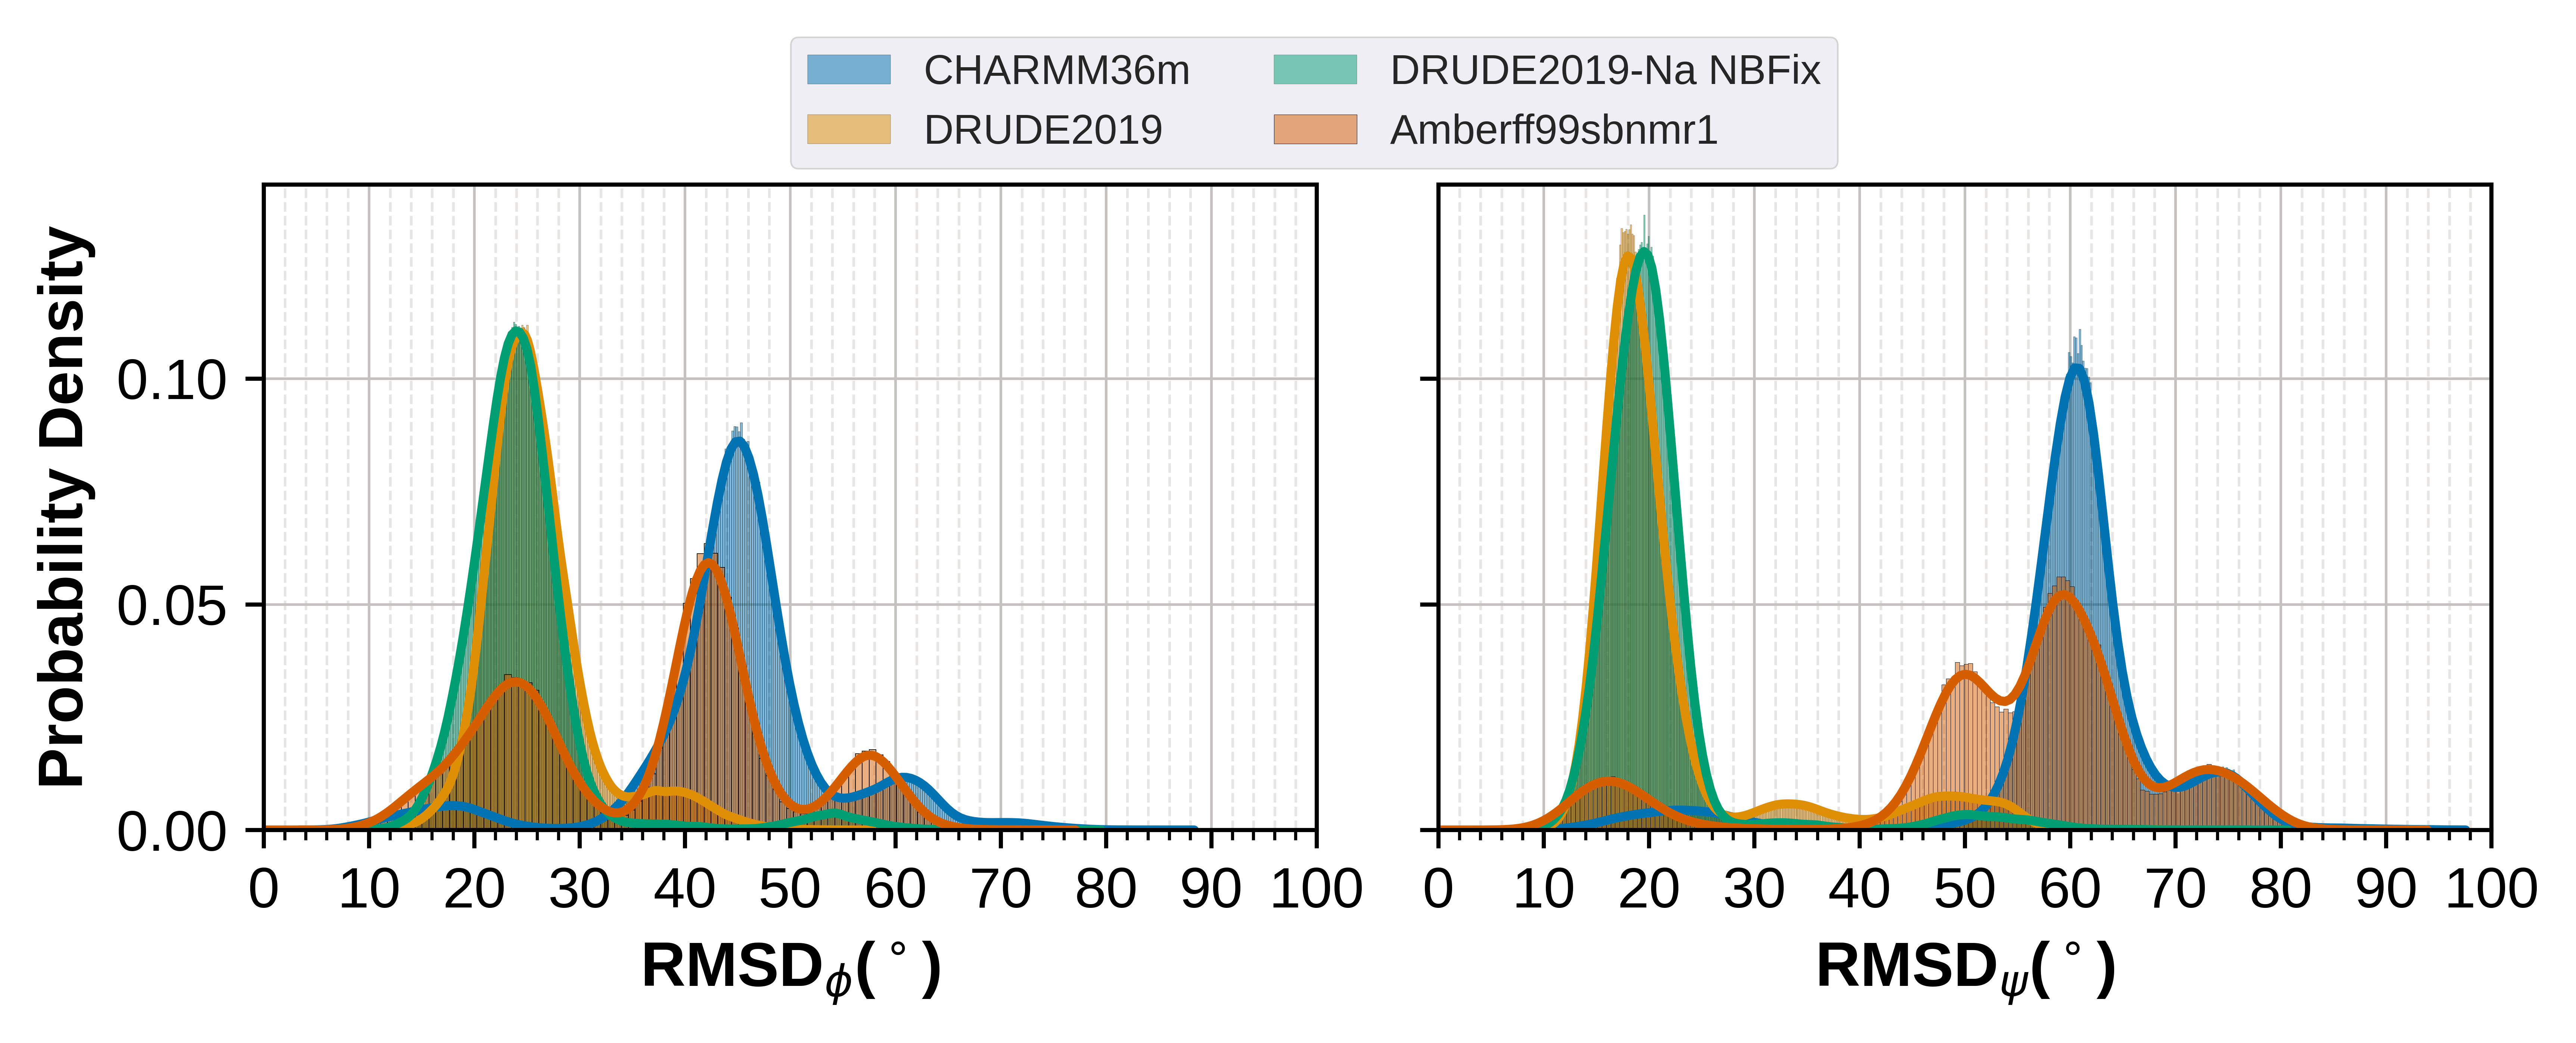

In [39]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
plt.rcParams.update(plt.rcParamsDefault)
%matplotlib inline
fig, axs= plt.subplots(nrows=1,ncols=2,figsize=(7,2.5),dpi=1000,sharey=True,layout="tight")
#plt.rcParams["font.size"]=23
plt.style.use("seaborn-v0_8")
color_blind_palette = sns.color_palette("colorblind", 4)
sns.histplot(C36_phi_RMSD,stat="density",kde=True,color=color_blind_palette[0],
                    # alpha=0.3,
                     ax=axs[0],
                    )
sns.histplot(D19_phi_RMSD,stat="density",kde=True,color=color_blind_palette[1],
                    # alpha=0.3,
                     ax=axs[0],
                    )
sns.histplot(D19n_phi_RMSD,stat="density",kde=True,color=color_blind_palette[2],
                    # alpha=0.3,
                     ax=axs[0],
                    )
sns.histplot(Amber_phi_RMSD[:,1],stat="density",kde=True,color=color_blind_palette[3],
                    # alpha=0.3,
                     ax=axs[0],
                    )
axs[0].xaxis.set_minor_locator(MultipleLocator(2))
axs[0].xaxis.set_major_locator(MultipleLocator(10))
axs[0].set_axisbelow(True)
axs[0].grid(visible=True,color='#C4C1BE', linestyle='-', linewidth=0.5, zorder=1)
axs[0].grid(which="minor",visible=True,color='#C4C1BE', linestyle='--', linewidth=0.5, zorder=1,alpha=0.4)
#axs[0].legend(fontsize=8,frameon=False,ncols=2)
#axs[0].legend(fontsize=10, frameon=False, ncol=4, loc='upper center', bbox_to_anchor=(0.5, 1.3))
axs[0].set_xlim([0,100])
#axs[0].set_title(r"RMSD for $\phi$")

sns.histplot(C36_psi_RMSD,stat="density",kde=True,color=color_blind_palette[0],label="CHARMM36m",
                    # alpha=0.3,
                     ax=axs[1],
                    )
sns.histplot(D19_psi_RMSD,stat="density",kde=True,color=color_blind_palette[1],label="DRUDE2019",
                    # alpha=0.3,
                     ax=axs[1],
                    )
sns.histplot(D19n_psi_RMSD,stat="density",kde=True,color=color_blind_palette[2],label="DRUDE2019-Na NBFix",
                    # alpha=0.3,
                     ax=axs[1],
                    )
sns.histplot(Amber_psi_RMSD[:,1],stat="density",kde=True,color=color_blind_palette[3],label="Amberff99sbnmr1",
                    # alpha=0.3,
                     ax=axs[1],
                    )
axs[1].xaxis.set_minor_locator(MultipleLocator(2))
axs[1].xaxis.set_major_locator(MultipleLocator(10))
axs[1].set_axisbelow(True)
axs[1].grid(visible=True,color='#C4C1BE', linestyle='-', linewidth=0.5, zorder=1)
axs[1].grid(which="minor",visible=True,color='#C4C1BE', linestyle='--', linewidth=0.5, zorder=1,alpha=0.4)
axs[1].set_xlim([0,100])
axs[0].set_xlabel(r"RMSD$_{\phi}$($^\circ$)",fontsize=12,fontweight="bold")
axs[1].set_xlabel(r"RMSD$_{\psi}$($^\circ$)",fontsize=12,fontweight="bold")
axs[1].set_ylabel("Probability Density",fontsize=12,fontweight="bold")
axs[0].set_ylabel("Probability Density",fontsize=12,fontweight="bold")
axs[0].tick_params(axis="x",which="minor",color="k",direction="out")
axs[0].tick_params(axis='both', which='major', labelsize=11)
axs[1].tick_params(axis="x",which="minor",color="k",direction="out")
axs[1].tick_params(axis='both', which='major', labelsize=11)
fig.subplots_adjust(top=0.85,wspace=0.1)
fig.legend(fontsize=8,frameon=True,bbox_to_anchor=(0.51, 1.12),loc="upper center",ncols=2)
#axs[0].text(0.01, 0.15, '(a)', fontsize=12, fontweight="bold",ha="left")
#axs[1].text(0.01, 0.15, '(b)', fontsize=12, fontweight="bold",ha="left")

# Add text to the second subplot (top-right)
#axs[1].set_title(r"RMSD for $\psi$")
#fig.subplots_adjust(top=0.85)
fig.savefig("plots/Figure3_dihedral_RMSD_density.png",dpi=1000,bbox_inches='tight',pad_inches=0.05)

# Figure 4: Ramachandran Free Energy Landscape for residues of loop I

In [40]:
def phi_psi_pmf(phi,psi):
    kT=0.596
    counts, xedges, yedges = np.histogram2d(phi, psi, bins=250, range=[[-180, 180], [-180, 180]], density=False)
    prob=(counts)/np.sum(counts)
    # Calculate the bin centers
    xcenters = (xedges[:-1] + xedges[1:]) / 2
    ycenters = (yedges[:-1] + yedges[1:]) / 2

    # Convert probability density to free energy
    # Avoid taking log of zero
    prob[prob==0]=prob[prob>0].min()*1e-01
    free_energy = -kT * np.log(prob)
    #free_energy = np.nan_to_num(free_energy, nan=np.inf)  # Handle log(0) by setting to infinity
    free_energy = free_energy-np.min(free_energy)
    return [xcenters,ycenters,free_energy.T]

In [42]:
resid1=28
resid2=29
phi_psi_file1=f"all_frame_phi_psi_resid_{resid1}.npy"
phi_psi_file2=f"all_frame_phi_psi_resid_{resid2}.npy"

C36_s1_phi_psi1=np.load(f"{C36_loc}ramachandran/set1/{phi_psi_file1}",allow_pickle=True)
C36_s2_phi_psi1=np.load(f"{C36_loc}ramachandran/set2/{phi_psi_file1}",allow_pickle=True)

Amber_phi_psi1=np.load(f"{Amber_loc}ramachandran/{phi_psi_file1}",allow_pickle=True)

D19_s1_phi_psi1=np.load(f"{D19_loc}ramachandran/set1/{phi_psi_file1}",allow_pickle=True)
D19_s2_phi_psi1=np.load(f"{D19_loc}ramachandran/set2/{phi_psi_file1}",allow_pickle=True)
D19_s3_phi_psi1=np.load(f"{D19_loc}ramachandran/set3/{phi_psi_file1}",allow_pickle=True)

D19n_s1_phi_psi1=np.load(f"{D19n_loc}ramachandran/set1/{phi_psi_file1}",allow_pickle=True)
D19n_s2_phi_psi1=np.load(f"{D19n_loc}ramachandran/set2/{phi_psi_file1}",allow_pickle=True)
D19n_s3_phi_psi1=np.load(f"{D19n_loc}ramachandran/set3/{phi_psi_file1}",allow_pickle=True)

C36_s1_phi_psi2=np.load(f"{C36_loc}ramachandran/set1/{phi_psi_file2}",allow_pickle=True)
C36_s2_phi_psi2=np.load(f"{C36_loc}ramachandran/set2/{phi_psi_file2}",allow_pickle=True)

Amber_phi_psi2=np.load(f"{Amber_loc}ramachandran/{phi_psi_file2}",allow_pickle=True)

D19_s1_phi_psi2=np.load(f"{D19_loc}ramachandran/set1/{phi_psi_file2}",allow_pickle=True)
D19_s2_phi_psi2=np.load(f"{D19_loc}ramachandran/set2/{phi_psi_file2}",allow_pickle=True)
D19_s3_phi_psi2=np.load(f"{D19_loc}ramachandran/set3/{phi_psi_file2}",allow_pickle=True)

D19n_s1_phi_psi2=np.load(f"{D19n_loc}ramachandran/set1/{phi_psi_file2}",allow_pickle=True)
D19n_s2_phi_psi2=np.load(f"{D19n_loc}ramachandran/set2/{phi_psi_file2}",allow_pickle=True)
D19n_s3_phi_psi2=np.load(f"{D19n_loc}ramachandran/set3/{phi_psi_file2}",allow_pickle=True)

In [43]:
C36_phi_psi1=np.row_stack((C36_s1_phi_psi1,C36_s2_phi_psi1))
D19_phi_psi1=np.row_stack((D19_s1_phi_psi1,D19_s2_phi_psi1,D19_s3_phi_psi1))
D19n_phi_psi1=np.row_stack((D19n_s1_phi_psi1,D19n_s2_phi_psi1,D19n_s3_phi_psi1))

C36_phi_psi2=np.row_stack((C36_s1_phi_psi2,C36_s2_phi_psi2))
D19_phi_psi2=np.row_stack((D19_s1_phi_psi2,D19_s2_phi_psi2,D19_s3_phi_psi2))
D19n_phi_psi2=np.row_stack((D19n_s1_phi_psi2,D19n_s2_phi_psi2,D19n_s3_phi_psi2))

In [44]:
C36_pmf1=phi_psi_pmf(C36_phi_psi1[:,0],C36_phi_psi1[:,1])
D19_pmf1=phi_psi_pmf(D19_phi_psi1[:,0],D19_phi_psi1[:,1])
D19n_pmf1=phi_psi_pmf(D19n_phi_psi1[:,0],D19n_phi_psi1[:,1])
Amber_pmf1=phi_psi_pmf(Amber_phi_psi1[:,0],Amber_phi_psi1[:,1])

C36_pmf2=phi_psi_pmf(C36_phi_psi2[:,0],C36_phi_psi2[:,1])
D19_pmf2=phi_psi_pmf(D19_phi_psi2[:,0],D19_phi_psi2[:,1])
D19n_pmf2=phi_psi_pmf(D19n_phi_psi2[:,0],D19n_phi_psi2[:,1])
Amber_pmf2=phi_psi_pmf(Amber_phi_psi2[:,0],Amber_phi_psi2[:,1])

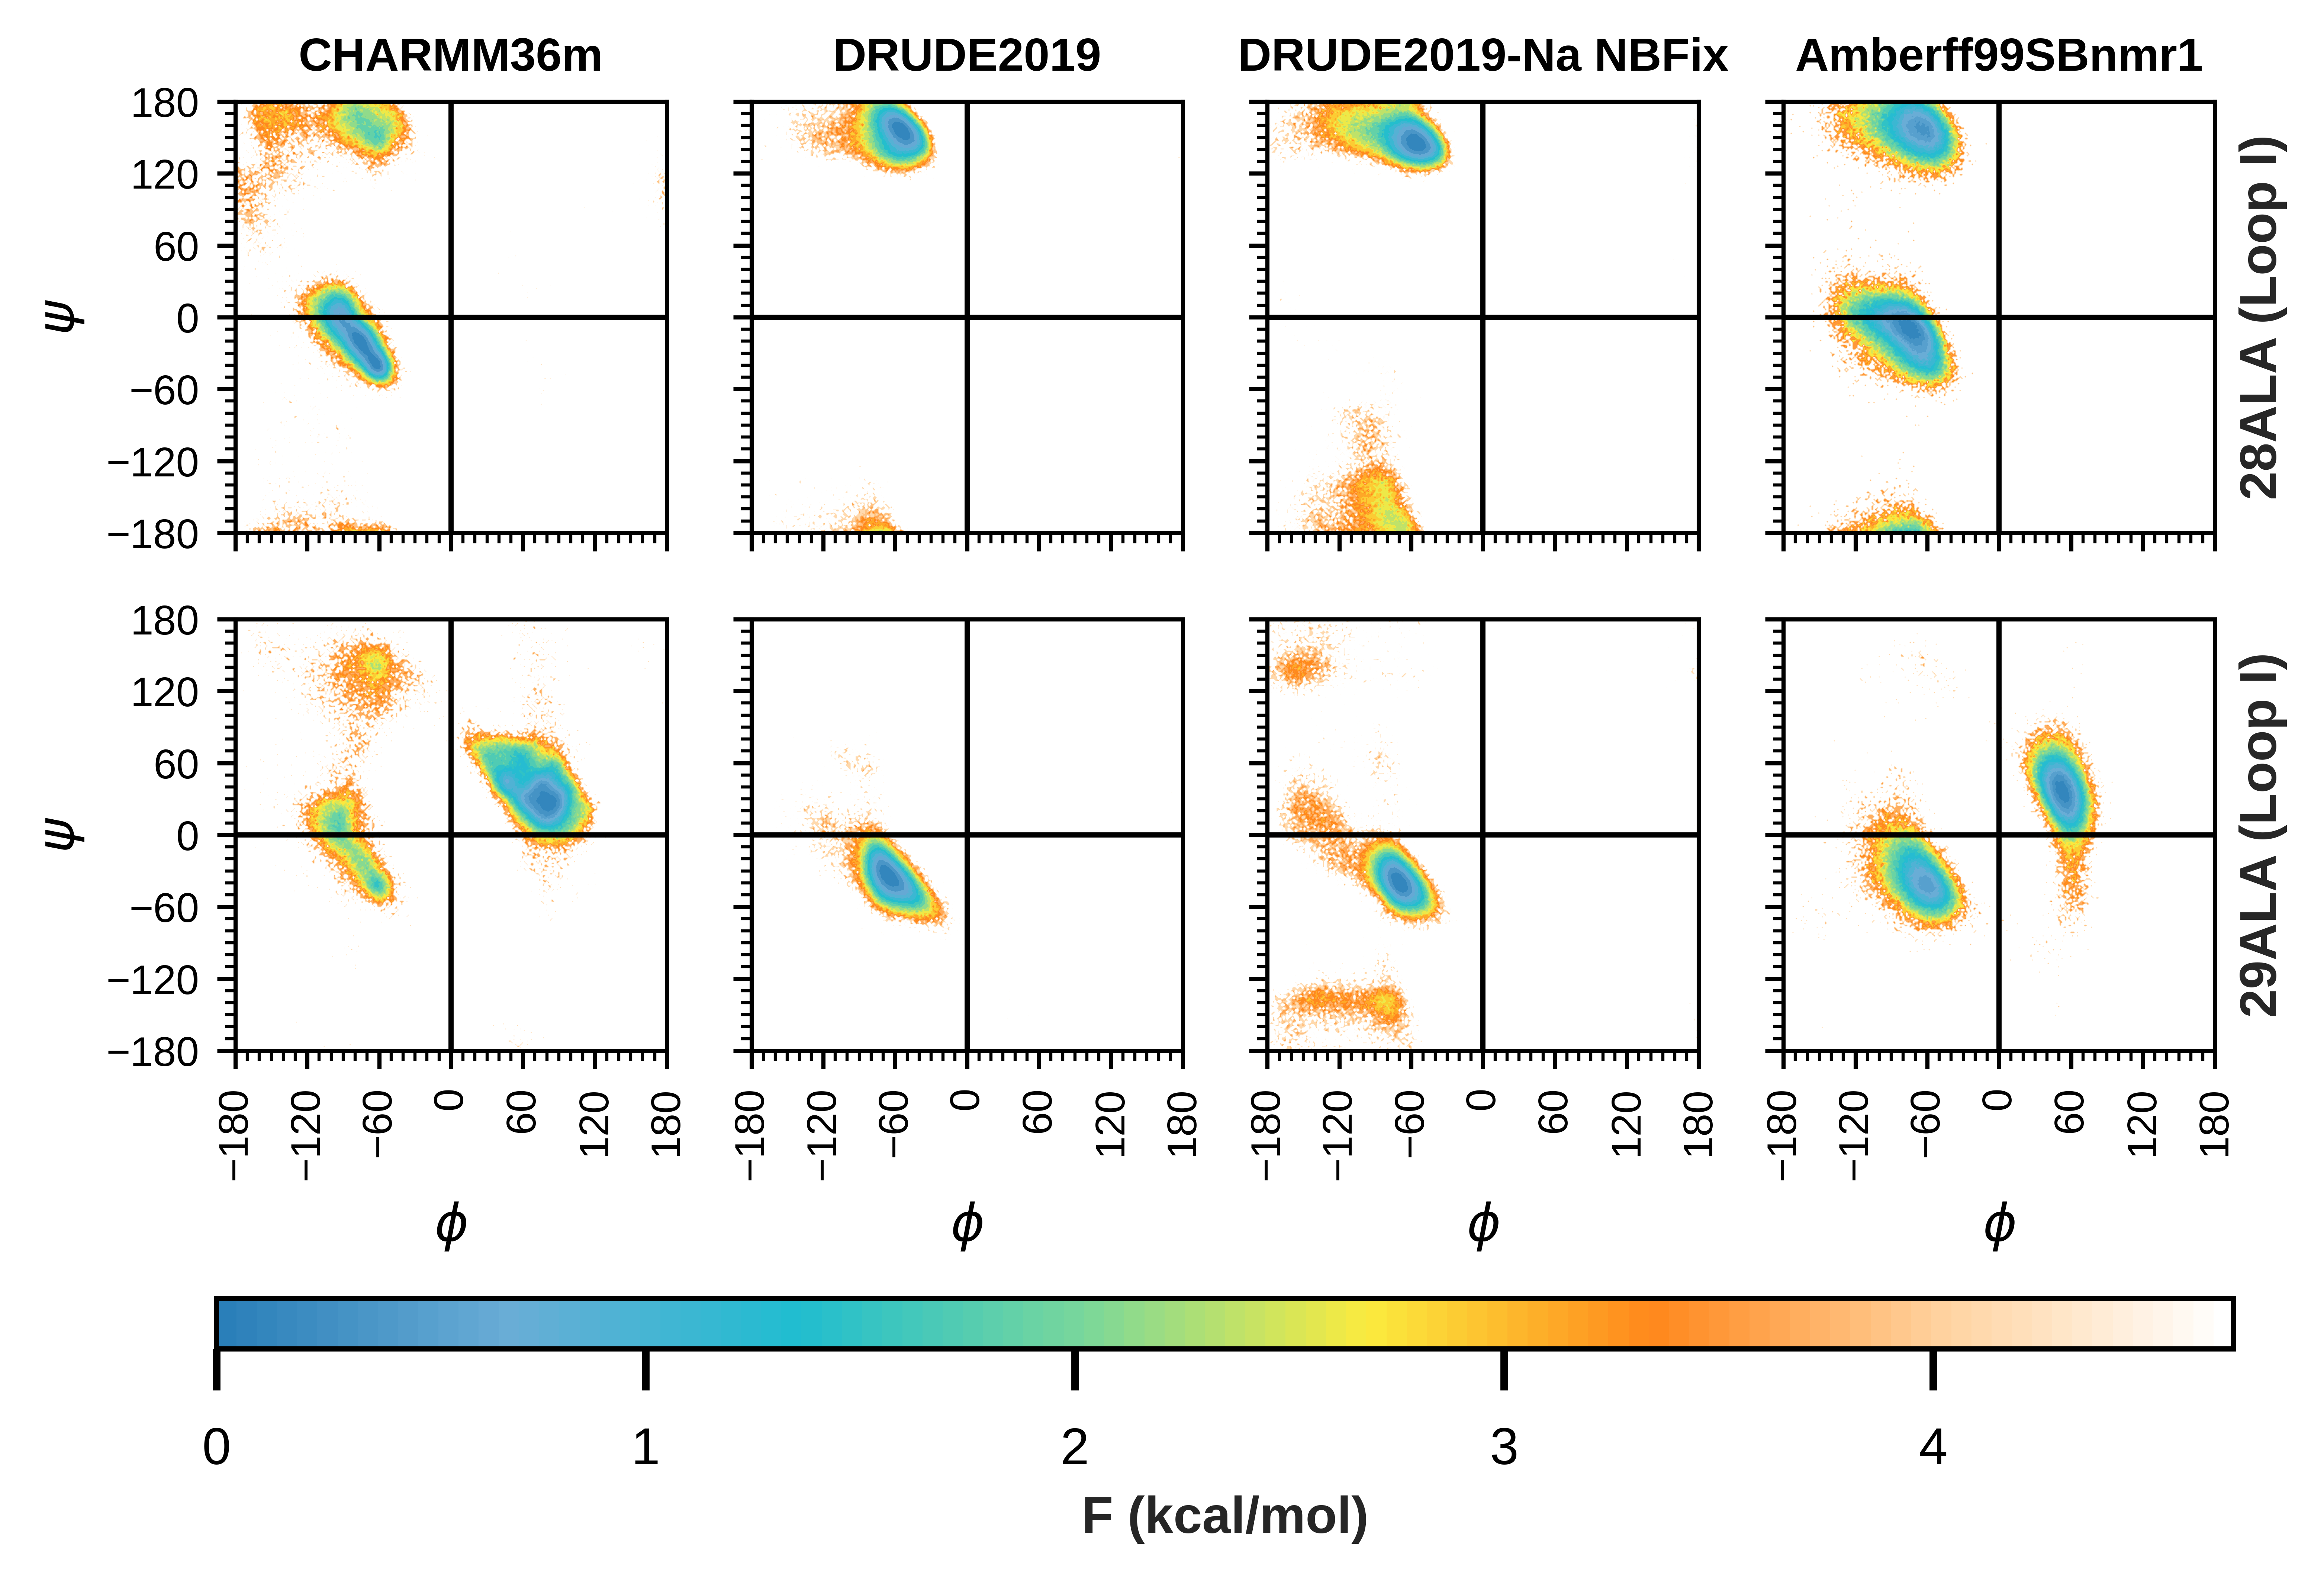

In [46]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import matplotlib.colors as mcolors
plt.rcParams.update(plt.rcParamsDefault)
%matplotlib inline
fig, axs= plt.subplots(nrows=2,ncols=4,figsize=(7,4.4),dpi=1000,sharey=True,sharex=True)
axs=axs.flatten()
#plt.rcParams["font.size"]=23
plt.style.use("seaborn-v0_8")
#color_blind_palette = sns.color_palette("colorblind", 4)
labels=["CHARMM36m","DRUDE2019","DRUDE2019-Na NBFix","Amberff99SBnmr1"]
N = 100
colors = [
    '#2a7fb9',  
    '#6aadd6',
    '#1fbdd0', 
    '#79d79b',  
    '#fbeb3e',  
    '#ff871b', 
    '#ffd29e',
    '#ffffff',
    #'#ffffff'            
]
cmap = mcolors.LinearSegmentedColormap.from_list('custom_cmap', colors, N=N)
min_val = min(C36_pmf1[2].min(), D19_pmf1[2].min(), D19n_pmf1[2].min(), Amber_pmf1[2].min(),C36_pmf2[2].min(), D19_pmf2[2].min(), D19n_pmf2[2].min(), Amber_pmf2[2].min())
max_val = max(C36_pmf2[2].max(), D19_pmf2[2].max(), D19n_pmf2[2].max(), Amber_pmf2[2].max(),C36_pmf1[2].max(), D19_pmf1[2].max(), D19n_pmf1[2].max(), Amber_pmf1[2].max())
norm = mcolors.Normalize(vmin=min_val, vmax=4.7)

contours = []
contours.append(axs[0].contourf(C36_pmf1[0], C36_pmf1[1], C36_pmf1[2], levels=25, cmap=cmap, norm=norm))
contours.append(axs[1].contourf(D19_pmf1[0], D19_pmf1[1], D19_pmf1[2], levels=25, cmap=cmap, norm=norm))
contours.append(axs[2].contourf(D19n_pmf1[0], D19n_pmf1[1], D19n_pmf1[2], levels=25, cmap=cmap, norm=norm))
contours.append(axs[3].contourf(Amber_pmf1[0], Amber_pmf1[1], Amber_pmf1[2], levels=25, cmap=cmap, norm=norm))
contours.append(axs[4].contourf(C36_pmf2[0], C36_pmf2[1], C36_pmf2[2], levels=25, cmap=cmap, norm=norm))
contours.append(axs[5].contourf(D19_pmf2[0], D19_pmf2[1], D19_pmf2[2], levels=25, cmap=cmap, norm=norm))
contours.append(axs[6].contourf(D19n_pmf2[0], D19n_pmf2[1], D19n_pmf2[2], levels=25, cmap=cmap, norm=norm))
contours.append(axs[7].contourf(Amber_pmf2[0], Amber_pmf2[1], Amber_pmf2[2], levels=25, cmap=cmap, norm=norm))


for i in range(8):
    axs[i].axhline(0, color='k', lw=1,zorder=1)
    axs[i].axvline(0, color='k', lw=1,zorder=1)
for i in range(8):
    if i<4:
        axs[i].set_title(f"{labels[i]}",fontsize=9,fontweight="semibold")
    axs[i].set_ylim([-180,180])
    axs[i].set_xlim([-180,180])
    axs[i].xaxis.set_minor_locator(MultipleLocator(10))
    axs[i].xaxis.set_major_locator(MultipleLocator(60))
    axs[i].yaxis.set_minor_locator(MultipleLocator(10))
    axs[i].yaxis.set_major_locator(MultipleLocator(60))
    axs[i].set_axisbelow(True)
    axs[i].grid(visible=True,color='#C4C1BE', linestyle='-', linewidth=0.5, zorder=1)
    axs[i].grid(which="minor",visible=True,color='#C4C1BE', linestyle='--', linewidth=0.5, zorder=1,alpha=0.4)
    if i==0 or i==4:
        axs[i].set_ylabel(r"$\psi$",fontsize=10,fontweight="bold")
    if i>=4:
        axs[i].set_xlabel(r"$\phi$",fontsize=10,fontweight="bold")
    axs[i].set_aspect('equal')
    axs[i].tick_params(axis="x",which="minor",color="k",direction="out")
    axs[i].tick_params(axis="x",which="major",color="k",direction="out",labelrotation=90)
    axs[i].tick_params(axis='both', which='major', labelsize=8)

axs[3].text(200, 0, '28ALA (Loop I)', fontsize=10, rotation=90, verticalalignment='center', fontweight='bold')
axs[7].text(200, 0, '29ALA (Loop I)', fontsize=10, rotation=90, verticalalignment='center', fontweight='bold')

    
cbar = fig.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ax=axs, orientation='horizontal', 
                    fraction=0.05, pad=0.5, location="bottom",aspect=40)
cbar.set_label('F (kcal/mol)', fontsize=10,fontweight="semibold")
cbar.outline.set_edgecolor('black') 
cbar.outline.set_linewidth(1.0)  
#cbar.ax.tick_params(color='black', labelcolor='black',direction="out") 
cbar.ax.tick_params(color='black', labelcolor='black', size=8, width=1.5)  

cbar.set_ticks([0, 1, 2, 3, 4, ])
cbar.ax.minorticks_on()

fig.subplots_adjust(bottom=0.3,wspace=0.1, hspace=0.2)
fig.savefig("plots/Figure4_rama_PMF_res28-29.png",dpi=1000,bbox_inches='tight',pad_inches=0.05)


# Figure 5: Salt bridge number and lifetime distribution

In [49]:
######################################################################
### SALT BRIDGE COUNT PER FRAME#######################################
######################################################################

file="count_framewise_salt_bridge_pair.npy"

C36_cnt_sb_set1=np.load(f"{C36_loc}salt_bridge/set1/{file}")
C36_cnt_sb_set2=np.load(f"{C36_loc}salt_bridge/set2/{file}")

D19_cnt_sb_set1=np.load(f"{D19_loc}salt_bridge/set1/{file}")
D19_cnt_sb_set2=np.load(f"{D19_loc}salt_bridge/set2/{file}")
D19_cnt_sb_set3=np.load(f"{D19_loc}salt_bridge/set3/{file}")

D19n_cnt_sb_set1=np.load(f"{D19n_loc}salt_bridge/set1/{file}")
D19n_cnt_sb_set2=np.load(f"{D19n_loc}salt_bridge/set2/{file}")
D19n_cnt_sb_set3=np.load(f"{D19n_loc}salt_bridge/set3/{file}")

Amber_cnt_sb=np.load(f"{Amber_loc}salt_bridge/{file}")

C36_cnt_sb=np.concatenate((C36_cnt_sb_set1[:,1],C36_cnt_sb_set1[:,1]))
D19_cnt_sb=np.concatenate((D19_cnt_sb_set1[:,1],D19_cnt_sb_set2[:,1],D19_cnt_sb_set3[:,1]))
D19n_cnt_sb=np.concatenate((D19n_cnt_sb_set1[:,1],D19n_cnt_sb_set1[:,1],D19n_cnt_sb_set3[:,1]))

In [50]:
######################################################################
### SALT BRIDGE LIFETIME #############################################
######################################################################

res_D19_sb_1=np.genfromtxt(f"{D19_loc}salt_bridge/set1/residence_time_salt_bridge.dat")*20/1e3
res_D19_sb_2=np.genfromtxt(f"{D19_loc}salt_bridge/set2/residence_time_salt_bridge.dat")*20/1e3
res_D19_sb_3=np.genfromtxt(f"{D19_loc}salt_bridge/set3/residence_time_salt_bridge.dat")*20/1e3

res_C36_sb_1=np.genfromtxt(f"{C36_loc}salt_bridge/set1/residence_time_salt_bridge.dat")*20/1e3
res_C36_sb_2=np.genfromtxt(f"{C36_loc}salt_bridge/set2/residence_time_salt_bridge.dat")*20/1e3


res_D19n_sb_1=np.genfromtxt(f"{D19n_loc}salt_bridge/set1/residence_time_salt_bridge.dat")*20/1e3
res_D19n_sb_2=np.genfromtxt(f"{D19n_loc}salt_bridge/set2/residence_time_salt_bridge.dat")*20/1e3
res_D19n_sb_3=np.genfromtxt(f"{D19n_loc}salt_bridge/set3/residence_time_salt_bridge.dat")*20/1e3

res_Amber_sb=np.genfromtxt(f"{Amber_loc}salt_bridge/residence_time_salt_bridge.dat")*10/1e3

res_D19_sb=np.hstack((res_D19_sb_1,res_D19_sb_2,res_D19_sb_3))
res_D19n_sb=np.hstack((res_D19n_sb_1,res_D19n_sb_2,res_D19n_sb_3))
res_C36_sb=np.hstack((res_C36_sb_1,res_C36_sb_2))

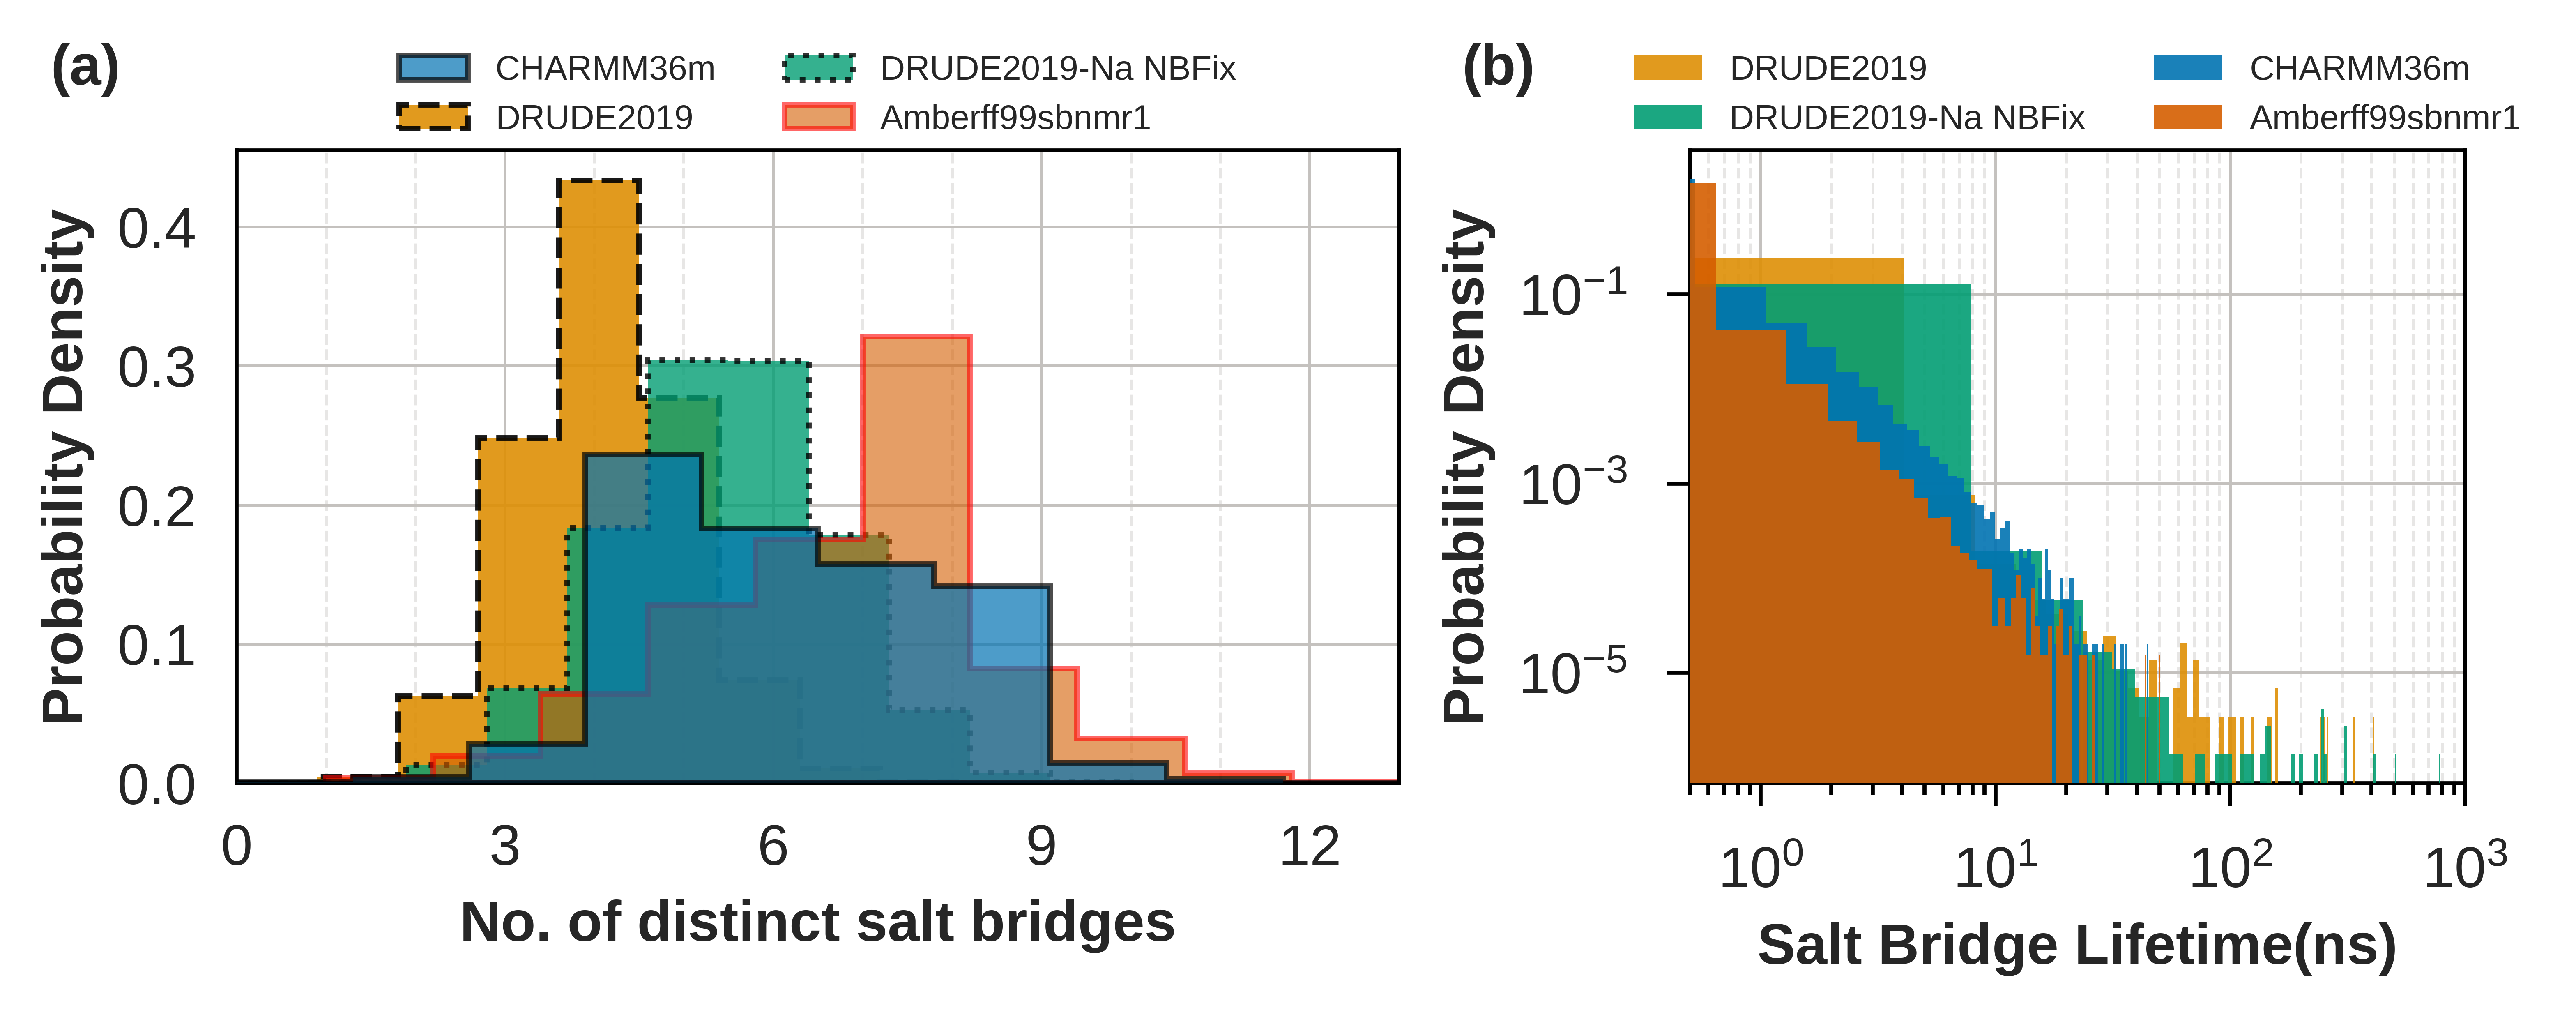

In [52]:
import matplotlib.gridspec as gridspec
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
fig = plt.figure(figsize=(7, 2),dpi=1000)
gs = gridspec.GridSpec(1, 2, width_ratios=[3, 2], wspace=0.3)
color_blind_palette = sns.color_palette("colorblind", 4)
#plt.style.use("seaborn-v0_8")

axs1 = fig.add_subplot(gs[0])
axs1.set_facecolor('white')
axs1.hist(C36_cnt_sb,density=True,color=color_blind_palette[0],label="CHARMM36m",alpha=0.7,zorder=100,ls="-",lw=1.0,edgecolor="k",histtype="stepfilled")
axs1.hist(D19_cnt_sb,density=True,color=color_blind_palette[1],label="DRUDE2019",alpha=0.9,ls="--",lw=1.0,edgecolor="k",histtype="stepfilled")
axs1.hist(D19n_cnt_sb,density=True,color=color_blind_palette[2],label="DRUDE2019-Na NBFix",alpha=0.8,ls=":",lw=1.0,edgecolor="k",histtype="stepfilled")
axs1.hist(Amber_cnt_sb[:,1],density=True,color=color_blind_palette[3],label="Amberff99sbnmr1",histtype="stepfilled",
                     alpha=0.6,ls="-",lw=1.0,edgecolor="red"

                    )
axs1.xaxis.set_minor_locator(MultipleLocator(1))
axs1.xaxis.set_major_locator(MultipleLocator(3))
axs1.set_xlim([0,13])
axs1.set_axisbelow(True)
axs1.grid(visible=True,color='#C4C1BE', linestyle='-', linewidth=0.5, zorder=1)
axs1.grid(which="minor",visible=True,color='#C4C1BE', linestyle='--', linewidth=0.5, zorder=1,alpha=0.4)
#axs.legend(fontsize=8,frameon=False,ncols=1)
axs1.set_xlabel(r"No. of distinct salt bridges",fontsize=10,fontweight="bold")
axs1.set_ylabel("Probability Density",fontsize=10,fontweight="bold")
#fig.savefig("salt_bridge_count.png",dpi=1000)
#fig.subplots_adjust(top=0.85)

for spine in axs1.spines.values():
    spine.set_visible(True)
    spine.set_linewidth(0.7)  # Adjust spine width if needed
    spine.set_edgecolor('black')

axs1.text(
        -0.1, 1.17,  # Offset to position text in the upper-left corner
        "(a)",
        transform=axs1.transAxes,  # Use Axes coordinates
        fontsize=10,
        fontweight='bold',
        va='top',
        ha='right'
    )    

#fig.subplots_adjust(top=0.85)
axs1.legend(fontsize=6,frameon=False,bbox_to_anchor=(0.5, 1.2),loc="upper center",ncols=2,framealpha=0.5)
axs2 = fig.add_subplot(gs[1])
axs2.set_facecolor('white')
axs2.hist(res_D19_sb,bins=100,density=True,label="DRUDE2019",alpha=0.9,zorder=10,color=color_blind_palette[1])
axs2.hist(res_D19n_sb,bins=100,density=True,label="DRUDE2019-Na NBFix",alpha=0.9,zorder=10,color=color_blind_palette[2])
axs2.hist(res_C36_sb,bins=100,density=True,label="CHARMM36m",alpha=0.9,zorder=10,color=color_blind_palette[0],)
axs2.hist(res_Amber_sb,bins=100,density=True,label="Amberff99sbnmr1",alpha=0.9,zorder=10,color=color_blind_palette[3],)
axs2.grid(visible=True,color='#C4C1BE', linestyle='-', linewidth=0.5, zorder=1,axis="both")
axs2.grid(which="minor",visible=True,color='#C4C1BE', linestyle='--', linewidth=0.5, zorder=1,alpha=0.4,axis="both")
axs2.tick_params(axis='both', which='major', direction="out", length=4, width=0.7, labelsize=10, color="black")
axs2.tick_params(axis='both', which='minor', direction="out", length=2, width=0.7, labelsize=10, color="black")
# axs[i].yaxis.set_major_locator(MultipleLocator(2))
# axs[i].yaxis.set_minor_locator(MultipleLocator(0.4))
for spine in axs2.spines.values():
    spine.set_visible(True)
    spine.set_linewidth(0.7)  # Adjust spine width if needed
    spine.set_edgecolor('black')
axs2.tick_params(axis='both',which="both",labelsize=10)
#axs[i].tick_params(axis='y', labelcolor="k",color="k",which="both",labelsize=9)

axs2.set_ylabel("Probability Density",fontsize=10,fontweight="semibold")

axs2.set_xscale("log")
axs2.set_yscale("log")


axs2.set_xlabel(r"Salt Bridge Lifetime(ns)",fontsize=10,fontweight="semibold")
#axs[i].set_ylim([0,0.2])
# axs[1].set_xlabel("protein-dipc residence time(ns)",fontsize=8)
# axs[2].set_xlabel("protein-chol residence time(ns)",fontsize=8)
axs2.set_xlim([5e-1,1e3])
axs2.text(
        -0.2, 1.17,  # Offset to position text in the upper-left corner
        "(b)",
        transform=axs2.transAxes,  # Use Axes coordinates
        fontsize=10,
        fontweight='bold',
        va='top',
        ha='right'
    )  
#axs2.set_xticks(ticks=[1e-1,1e0,1e1,1e2,1e3,1e4],labels=[r"$10^{-1}$","",r"$10^{1}$","",r"$10^{3}$",""])
axs2.legend(fontsize=6,frameon=False,bbox_to_anchor=(0.5, 1.2),loc="upper center",ncols=2,framealpha=0.5)
fig.savefig("plots/Figure5_salt_bridge_count_probability_dist_residence_time.png",dpi=1000,bbox_inches='tight',pad_inches=0.1)

# Figure 6: RDF of $Na^+$ ions around protein backbone and residence time of $Na^+$ ions

In [60]:
########################################################################################
### RDF of Na ions around protein backbone #############################################
########################################################################################

rdf_file=f"rdf_Na_prot_backbone.npz"


C36_s1_rdf=np.load(f"{C36_loc}cation_distribution/set1/{rdf_file}",allow_pickle=True)
C36_s2_rdf=np.load(f"{C36_loc}cation_distribution/set2/{rdf_file}",allow_pickle=True)

D19_s1_rdf=np.load(f"{D19_loc}cation_distribution/set1/{rdf_file}",allow_pickle=True)
D19_s2_rdf=np.load(f"{D19_loc}cation_distribution/set2/{rdf_file}",allow_pickle=True)
D19_s3_rdf=np.load(f"{D19_loc}cation_distribution/set3/{rdf_file}",allow_pickle=True)

D19n_s1_rdf=np.load(f"{D19n_loc}cation_distribution/set1/{rdf_file}",allow_pickle=True)
D19n_s2_rdf=np.load(f"{D19n_loc}cation_distribution/set2/{rdf_file}",allow_pickle=True)
D19n_s3_rdf=np.load(f"{D19n_loc}cation_distribution/set3/{rdf_file}",allow_pickle=True)


rdf_drude_new={}
rdf_drude_new["arr_0"]=(D19n_s1_rdf["arr_0"]+D19n_s2_rdf["arr_0"]+D19n_s3_rdf["arr_0"])/3
rdf_drude_new["arr_1"]=(D19n_s1_rdf["arr_1"]+D19n_s2_rdf["arr_1"]+D19n_s3_rdf["arr_1"])/3

rdf_drude_old={}
rdf_drude_old["arr_0"]=(D19_s1_rdf["arr_0"]+D19_s2_rdf["arr_0"]+D19_s3_rdf["arr_0"])/3
rdf_drude_old["arr_1"]=(D19_s1_rdf["arr_1"]+D19_s2_rdf["arr_1"]+D19_s3_rdf["arr_1"])/3

rdf_charmm={}
rdf_charmm["arr_0"]=(C36_s1_rdf["arr_0"]+C36_s2_rdf["arr_0"])/2
rdf_charmm["arr_1"]=(C36_s1_rdf["arr_1"]+C36_s2_rdf["arr_1"])/2

In [61]:
########################################################################################
### Residence time of Na ions around protein backbone ##################################
########################################################################################
res_Na_file="sod_residence_time_cutoff3.0_protein.dat"

Na_res_D19_sb_1=np.genfromtxt(f"{D19_loc}cation_distribution/set1/{res_Na_file}")*20/1e3
Na_res_D19_sb_2=np.genfromtxt(f"{D19_loc}cation_distribution/set2/{res_Na_file}")*20/1e3
Na_res_D19_sb_3=np.genfromtxt(f"{D19_loc}cation_distribution/set3/{res_Na_file}")*20/1e3

Na_res_C36_sb_1=np.genfromtxt(f"{C36_loc}cation_distribution/set1/{res_Na_file}")*20/1e3
Na_res_C36_sb_2=np.genfromtxt(f"{C36_loc}cation_distribution/set2/{res_Na_file}")*20/1e3


Na_res_D19n_sb_1=np.genfromtxt(f"{D19n_loc}cation_distribution/set1/{res_Na_file}")*20/1e3
Na_res_D19n_sb_2=np.genfromtxt(f"{D19n_loc}cation_distribution/set2/{res_Na_file}")*20/1e3
Na_res_D19n_sb_3=np.genfromtxt(f"{D19n_loc}cation_distribution/set3/{res_Na_file}")*20/1e3


res_D19_Na=np.hstack((Na_res_D19_sb_1,Na_res_D19_sb_2,Na_res_D19_sb_3))
res_D19n_Na=np.hstack((Na_res_D19n_sb_1,Na_res_D19n_sb_2,Na_res_D19n_sb_3))
res_C36_Na=np.hstack((Na_res_C36_sb_1,Na_res_C36_sb_2))

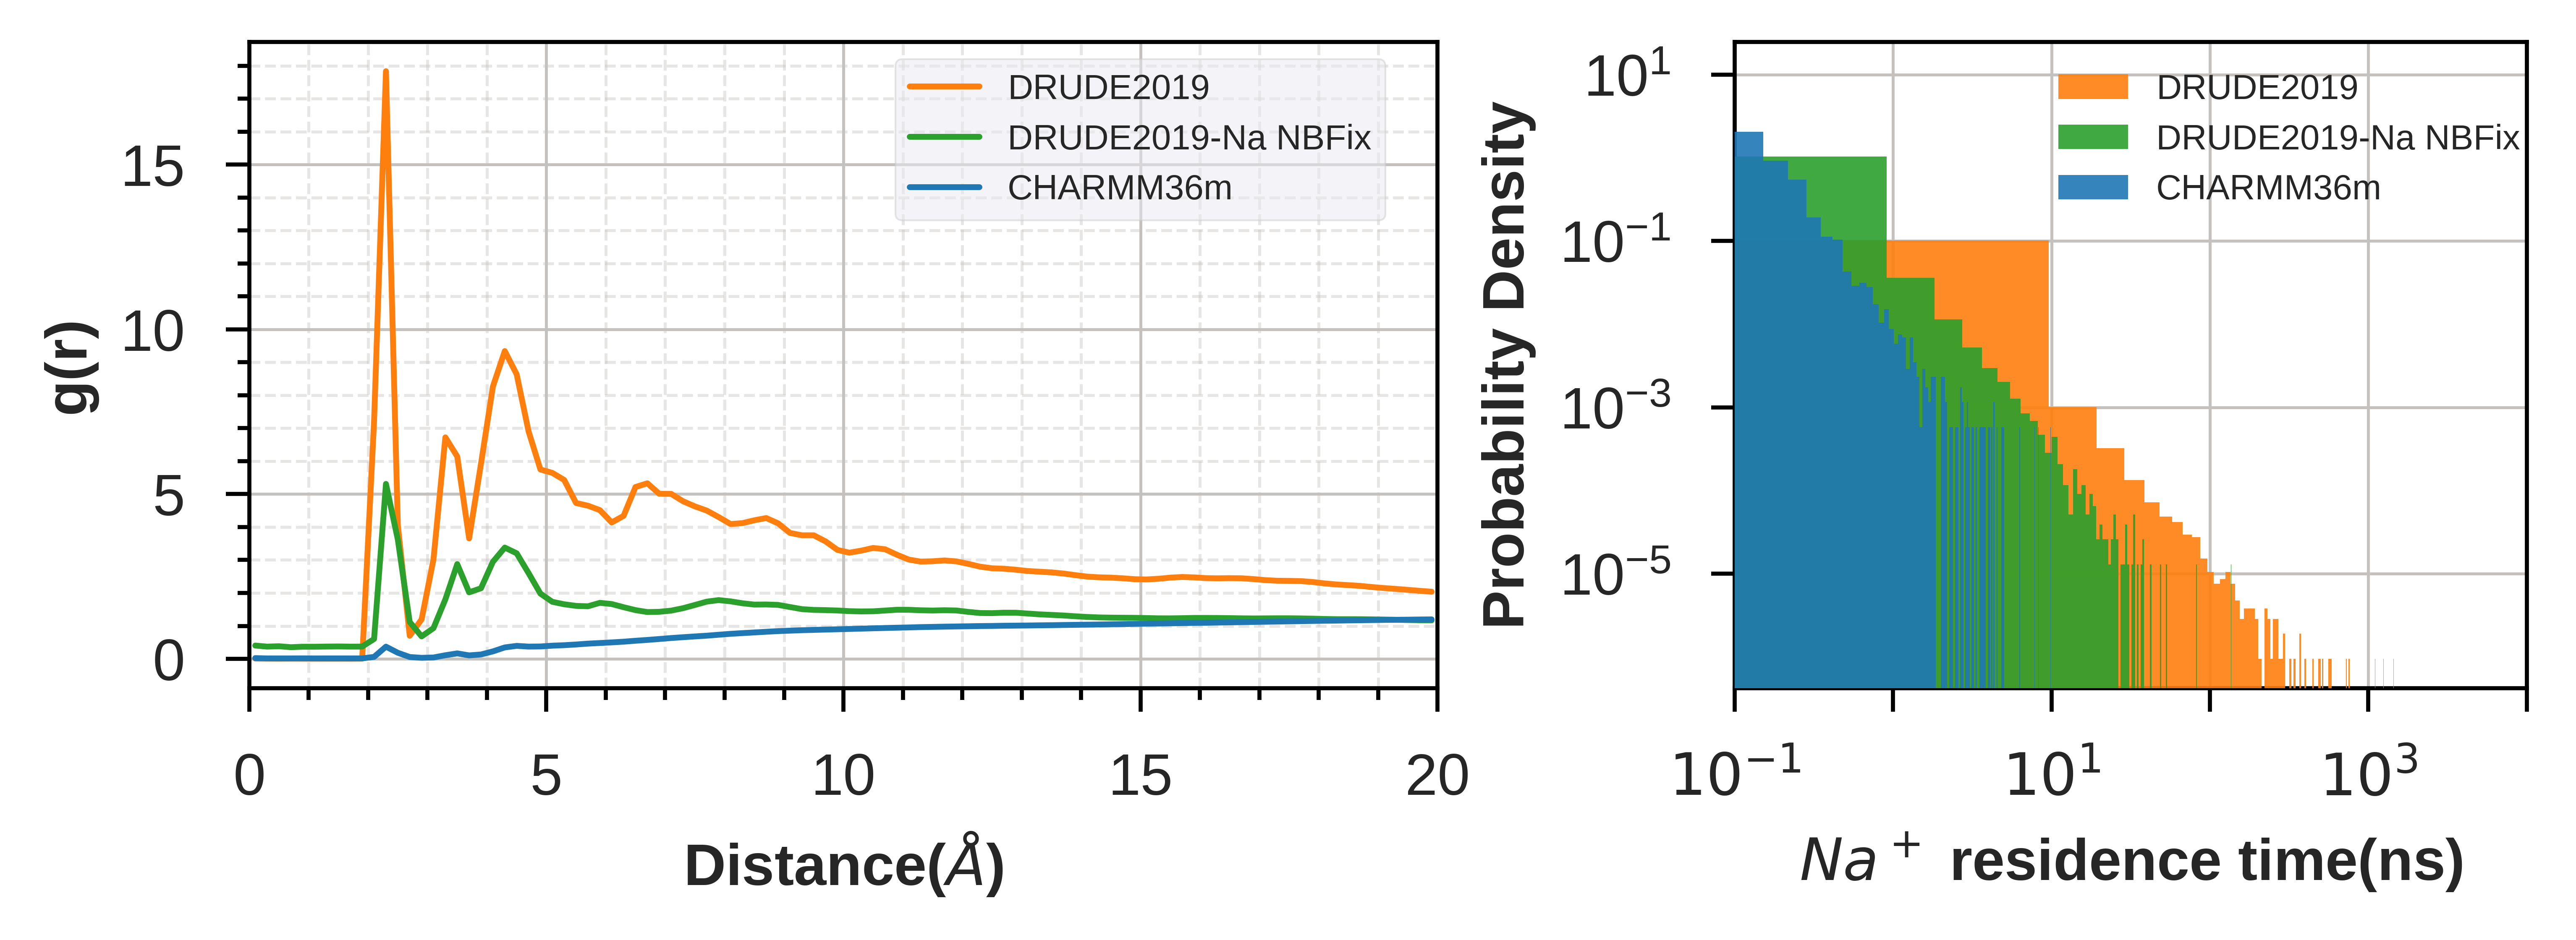

In [63]:
import matplotlib.gridspec as gridspec
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
fig = plt.figure(figsize=(7, 2),dpi=1000)
gs = gridspec.GridSpec(1, 2, width_ratios=[3, 2], wspace=0.3)
#plt.style.use("seaborn-v0_8")

axs1 = fig.add_subplot(gs[0])
axs1.set_facecolor('white')
axs1.plot(rdf_drude_old["arr_0"],rdf_drude_old["arr_1"],label="DRUDE2019",color="tab:orange",linewidth=1.0)
axs1.plot(rdf_drude_new["arr_0"],rdf_drude_new["arr_1"],label="DRUDE2019-Na NBFix",color="tab:green",linewidth=1.0)
axs1.plot(rdf_charmm["arr_0"],rdf_charmm["arr_1"],label="CHARMM36m",color="tab:blue",linewidth=1.0)
axs1.set_ylabel(r"g(r)",fontsize=10,fontweight="bold")
axs1.set_xlabel(r"Distance($\AA$)",fontsize=10,fontweight="semibold"),
axs1.set_xlim([0,20])
axs1.tick_params(axis='both', which='major', direction="out", length=4, width=0.7, labelsize=10, color="black")
axs1.tick_params(axis='both', which='minor', direction="out", length=2, width=0.7, labelsize=10, color="black")
axs1.xaxis.set_major_locator(MultipleLocator(5))
axs1.xaxis.set_minor_locator(MultipleLocator(1))
axs1.yaxis.set_major_locator(MultipleLocator(5))
axs1.yaxis.set_minor_locator(MultipleLocator(1))
axs1.grid(visible=True,color='#C4C1BE', linestyle='-', linewidth=0.5, zorder=1)
axs1.grid(which="minor",visible=True,color='#C4C1BE', linestyle='--', linewidth=0.5, zorder=1,alpha=0.4)

for spine in axs1.spines.values():
    spine.set_visible(True)
    spine.set_linewidth(0.7)  # Adjust spine width if needed
    spine.set_edgecolor('black')

#fig.subplots_adjust(top=0.85)
axs1.legend(fontsize=6,frameon=True,bbox_to_anchor=(0.75, 1.0),loc="upper center",ncols=1,framealpha=0.5)
axs2 = fig.add_subplot(gs[1])
axs2.set_facecolor('white')
axs2.hist(res_D19_Na,bins=150,density=True,label="DRUDE2019",alpha=0.9,zorder=10,color="tab:orange")
axs2.hist(res_D19n_Na,bins=150,density=True,label="DRUDE2019-Na NBFix",alpha=0.9,zorder=10,color="tab:green")
axs2.hist(res_C36_Na,bins=150,density=True,label="CHARMM36m",alpha=0.9,zorder=10,color="tab:blue")
axs2.grid(visible=True,color='#C4C1BE', linestyle='-', linewidth=0.5, zorder=1,axis="both")
axs2.grid(which="minor",visible=True,color='#C4C1BE', linestyle='--', linewidth=0.5, zorder=1,alpha=0.4,axis="both")
axs2.tick_params(axis='both', which='major', direction="out", length=4, width=0.7, labelsize=10, color="black")
axs2.tick_params(axis='both', which='minor', direction="out", length=2, width=0.7, labelsize=10, color="black")
# axs[i].yaxis.set_major_locator(MultipleLocator(2))
# axs[i].yaxis.set_minor_locator(MultipleLocator(0.4))
for spine in axs2.spines.values():
    spine.set_visible(True)
    spine.set_linewidth(0.7)  
    spine.set_edgecolor('black')
axs2.tick_params(axis='both',which="both",labelsize=10)
#axs[i].tick_params(axis='y', labelcolor="k",color="k",which="both",labelsize=9)

axs2.set_ylabel("Probability Density",fontsize=10,fontweight="semibold")

axs2.set_xscale("log")
axs2.set_yscale("log")


axs2.set_xlabel(r"$Na^+$ residence time(ns)",fontsize=10,fontweight="semibold")
#axs[i].set_ylim([0,0.2])
# axs[1].set_xlabel("protein-dipc residence time(ns)",fontsize=8)
# axs[2].set_xlabel("protein-chol residence time(ns)",fontsize=8)
axs2.set_xlim([1e-1,1e4])
axs2.set_xticks(ticks=[1e-1,1e0,1e1,1e2,1e3,1e4],labels=[r"$10^{-1}$","",r"$10^{1}$","",r"$10^{3}$",""])
axs2.legend(fontsize=6,frameon=False,bbox_to_anchor=(0.7, 1.0),loc="upper center",ncols=1,framealpha=0.5)
fig.savefig("plots/Figure6_RDFNa_restime_cutoff3.0.png",dpi=1000,bbox_inches='tight',pad_inches=0.05)